# Final Project Submission, Module 2

- Student name: Gina Durante
- Student pace: full time (4/15/19 cohort)
- Instructor name: Rafael Carrasco
- Blog post URL: https://gdurante2019.github.io (when completed)

# Project Description

## Goals

The goal of the project is to use statistical analysis of data in the Northwind SQL database to answer at least four questions of business relevance to Northwind, an importer of food and beverage products.  To answer these questions using statistical analysis, it will be necessary to perform hypothesis testing.  

The first of these four questions is a required question:  **_Do discounts have a statistically significant effect on the number of products customers order? If so, at what level(s) of discount?_**

## Deliverables

The following deliverables are required:

1. A **_Jupyter Notebook_** containing any code written for this project. 
2. A **_Blog Post_** explaining process, methodology, and findings.  
3. An **_"Executive Summary" PowerPoint Presentation_** that explains the hypothesis tests run, findings, and relevance to company stakeholders.  
4.  A **_Video Walkthrough_** of the “Executive Summary” presentation. 


## Questions Addressed
1.  (Required) Do discounts have a statistically significant effect on the average **quantity of products per order**? 
2.   Do discounts have a statistically significant effect on the average **revenue per order**?
3.   Does the _level_ of discount (e.g., 5%, 10%, 15%...) have a statistically significant effect on the average **quantity of products per order**?
4.  Does the _level_ of discount (e.g., 5%, 10%, 15%...) have a statistically significant effect on the average **revenue per order**?
5.  Do the revenue distributions differ in a statistically significant manner from one product category to the next?  Put another way, do some product categories have statistically significantly higher revenues per order than others?

## Importing data

#### Import libraries

In [43]:
import pandas as pd
from sqlite3 import *
from sqlalchemy import *
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


#### Create connection object

In [44]:
engine = create_engine('sqlite:///Northwind_small.sqlite', echo=False)
con = engine.connect()

#### Inspect the database schema (table names and column names)

In [45]:
# Get names of tables in database

inspector = inspect(engine)
print("Table names")
table_names = inspector.get_table_names()
pp.pprint(inspector.get_table_names())
print()


Table names
['Category',
 'Customer',
 'CustomerCustomerDemo',
 'CustomerDemographic',
 'Employee',
 'EmployeeTerritory',
 'Order',
 'OrderDetail',
 'Product',
 'Region',
 'Shipper',
 'Supplier',
 'Territory',
 'placeholder']



In [46]:
# Get column names for a specific table
    
def print_col_names(var_table):
    var_table = var_table
    print(f"Column names for table {var_table}:")
    for i in inspector.get_columns(var_table):
        print(i['name'])
    print()


In [47]:
print_col_names('Customer')

Column names for table Customer:
Id
CompanyName
ContactName
ContactTitle
Address
City
Region
PostalCode
Country
Phone
Fax



In [48]:
print_col_names('Order')

Column names for table Order:
Id
CustomerId
EmployeeId
OrderDate
RequiredDate
ShippedDate
ShipVia
Freight
ShipName
ShipAddress
ShipCity
ShipRegion
ShipPostalCode
ShipCountry



In [49]:
print_col_names('OrderDetail')

Column names for table OrderDetail:
Id
OrderId
ProductId
UnitPrice
Quantity
Discount



In [50]:
print_col_names('Product')

Column names for table Product:
Id
ProductName
SupplierId
CategoryId
QuantityPerUnit
UnitPrice
UnitsInStock
UnitsOnOrder
ReorderLevel
Discontinued



In [51]:
print_col_names('Category')

Column names for table Category:
Id
CategoryName
Description



#### Importing data and setting up dataframes

In [53]:
# Create a connection object and a cursor object to execute SQL commands
engine = create_engine('sqlite:///Northwind_small.sqlite', echo=False)
con = engine.connect()

# Set up query
query = """
        SELECT o.id, o.CustomerID, o.OrderDate, 
        od.ProductID, od.UnitPrice as [OrderUnitPrice], 
        od.Quantity as [OrderQty], od.Discount, 
        p.ProductName, p.CategoryId, 
        cat.CategoryName, cat.Description as [CatDescription]
        FROM [Order] as o 
        JOIN OrderDetail as oD
        ON o.ID = od.OrderID   
        JOIN Product as p
        ON od.ProductID = p.ID
        JOIN Category as cat
        ON cat.id = p.CategoryId
        ORDER BY ProductID
        """

# Execute query and create df from results
res = con.execute(query)
df = pd.read_sql(query, con)
df.head()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,10294,RATTC,2012-08-30,1,14.4,18,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,10317,LONEP,2012-09-30,1,14.4,20,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
4,10354,PERIC,2012-11-14,1,14.4,12,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


#### Function to pull original data from sqlite db and load into pandas dataframe

In [54]:
# Function load_df() to pull original data from sqlite db and load into pandas 
# dataframe.  This function is used as a subfunction later in the notebook 
# to enable reconstruction of the database if needed.


def load_df(query):
    
    # Create a connection object and a cursor object to execute SQL commands
    engine = create_engine('sqlite:///Northwind_small.sqlite', echo=False)
    con = engine.connect()
    
    # Set up query
    query = """
            SELECT o.id, o.CustomerID, o.OrderDate, 
            od.ProductID, od.UnitPrice as [OrderUnitPrice], 
            od.Quantity as [OrderQty], od.Discount, 
            p.ProductName, p.CategoryId, 
            cat.CategoryName, cat.Description as [CatDescription]
            FROM [Order] as o 
            JOIN OrderDetail as oD
            ON o.ID = od.OrderID   
            JOIN Product as p
            ON od.ProductID = p.ID
            JOIN Category as cat
            ON p.CategoryId = cat.Id
            ORDER BY ProductID
            """
    
    # Execute query and create df from results
    res = con.execute(query)
    df = pd.read_sql(query, con)
    return df


In [55]:
df = load_df(query)
df.head()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
1,10294,RATTC,2012-08-30,1,14.4,18,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,10317,LONEP,2012-09-30,1,14.4,20,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
4,10354,PERIC,2012-11-14,1,14.4,12,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


# First question:  Quantity and discount/no discount

Do discounts result in a statistically significant effect on **_quantity of products per order_**?


## Null and alternative hypotheses

-  **Null hypothesis:** No statistically significant difference between the means of quantities of discounted products purchased per order versus quantities of non-discounted products purchased per order
    -  Ho:  $\mu_1 = \mu_2$

-  **Alternative hypothesis:**  Statistically significant differences between the means of quantities of discounted products purchased per order versus quantities of non-discounted products purchased per order are unlikely to be due to chance
    -  Ha:  $\mu_1 \neq \mu_2$

## EDA

###  Create dataframes looking at subsets of data

Create dataframes that contain products ordered without discounts and products ordered that were discounted:

In [56]:
df_no_disc = df.loc[df['Discount'] == 0]
df_no_disc.head()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription
1,10294,RATTC,2012-08-30,1,14.4,18,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
2,10317,LONEP,2012-09-30,1,14.4,20,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
4,10354,PERIC,2012-11-14,1,14.4,12,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
6,10406,QUEE,2013-01-07,1,14.4,10,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
7,10413,LAMAI,2013-01-14,1,14.4,24,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


In [57]:
df_disc = df.loc[df['Discount'] > 0]
df_disc.head()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
5,10370,CHOPS,2012-12-03,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
9,10522,LEHMS,2013-04-30,1,18.0,40,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"
10,10526,WARTH,2013-05-05,1,18.0,8,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales"


### Create plotting functions for visualizations

In [58]:
# Functions for plotting average order quantities

from collections import Counter

def hist_plot1_qty(series1, label=None, color='darkcyan', alpha=0.7, bins=30, xlim=[0, 150]):
    plt.hist(series1, label=label, color=color, alpha=alpha, bins=bins)
    plt.title(f"Order quantity by occurrence")
    plt.xlabel("Order Quantity")
    plt.ylabel("Number")
    plt.legend(loc='best')
    plt.xlim(xlim)
    plt.show()
    
# function for plotting two series    
def hist_plot2_qty(series1, series2, label=None, label1=None, color1='b', color2='r', alpha=0.4, bins=30, xlim=[0, 150], print_vlines=False):
    plt.hist(series1, label=label, color=color1, alpha=alpha, bins=bins)
    plt.hist(series2, label=label1, color=color2, alpha=alpha, bins=bins)
    plt.title(f"Order quantity by occurrence")
    plt.xlabel("Order Quantity")
    plt.ylabel("Number")
    if print_vlines:
        plt.vlines([np.mean(series1), np.mean(series2)], 0, 38, colors='k', label='Mean order quantity', linewidth=.75)
    plt.legend(loc='best')
    plt.xlim(xlim)  
    plt.show()
    
# function for plotting three different series 
def hist_plot3_qty(var1, var2, var3, label=None, label1=None, label2=None, color='b', alpha=0.5, bins=30, xlim=[0, 150]):
    var1 = var1
    var2 = var2
    var3 = var3
    alpha = alpha
    plt.hist(var1, label=label, color='r', alpha=0.5, bins=bins)
    plt.hist(var2, label=label1, color='b', alpha=0.5, bins=bins)
    plt.hist(var3, label=label2, color='g', alpha=0.5, bins=bins)
    plt.title(f"Order quantity by occurrence")
    plt.xlabel("Order Quantity")
    plt.ylabel("Number")
    plt.legend(loc='best')
    plt.xlim(xlim)
    plt.show()


### Histogram of total average order quantity by average order quantity for no discount vs. some discount

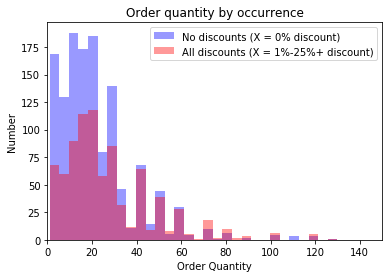

In [59]:
# plt.figure(figsize=(8, 6))
hist_plot2_qty(df_no_disc.OrderQty, df_disc.OrderQty, label='No discounts (X = 0% discount)', label1='All discounts (X = 1%-25%+ discount)')

The histogram shows the distribution of order quantities values (x-axis).  The distribution of both order quantities without discounts and total order quantities (whether discounted or not) appear very similar, with the smallest order amounts appearing at the far left hand side of graph and the highest order order amounts appearing at the far right.  

If discounts have an effect on the quantity of products sold, we would expect to see the distribution of quantities sold from discounts look different from the distribution of quantities sold that didn't involve discounts.  If the shape of the distribution changes, such that a greater proportion of quantities appear in the middle or far right-hand-side of the graph, then that difference in distribution suggests that discounts increase the quantity of products in a given order.  

## Testing for significance:  sampling, test setup and results 

To test whether or not the presence of a discount likely has an effect on the quantity of products sold, we can use a two-sided t-test.  Two prerequisites for performing this test are that 1) both datasets have approximately normal distributions and 2) the variances of the two datasets are equal.  

### Test chosen:  t-test (2-sided, 2-sample) 
We can see that the above distributions are not normal.  Before proceding with the 2-sides, 2-sample t-test, we must first address this issue.

Fortunately, we can obtain a normal distribution (per the Central Limit Theorem) by sampling each dataset multiple times and computing each sample's mean.  With a large enough number of samples (n > 30) we can expect that the distribution of the means will be normal or very nearly normal.  We can take these normal distributions and run statistical tests on them.  

Each time the cells below are run, 100 samples are taken 300 times for each of the two populations (orders with no discounts and orders with some level of discount).  The mean and standard deviation are computed for each of the 300 sampling events, and each of the resulting means and standard deviations is appended to the respective relevant list.  

Multiple sampling results in different results each time; however, because there are well over 30 means and standard deviations, we can assume that the distributions of these means and standard deviations are normal, per the Central Limit Theorem.  We can now perform hypothesis tests requiring normal distributions of statistics on these means and standard deviations.

### Sampling function to obtain normal distribution of means

In [60]:
def sampling_mean(var, sampling_events=300, size=100):   # var is the dataframe and column of interest
    import numpy as np
    var = var
    samp_mean = []
    samp_std = []
    for i in range(sampling_events):
        sample = np.random.choice(var, size=size, replace=False)
        samp_mean.append(sample.mean())
        samp_std.append(sample.std())
    return samp_mean, samp_std


In [61]:
sampling_no_disc_mean, sampling_no_disc_std = sampling_mean(df_no_disc.OrderQty)
print(np.mean(sampling_no_disc_mean))
print(np.std(sampling_no_disc_std))

21.839133333333333
2.3323770224106717


### Histograms of sampling distributions

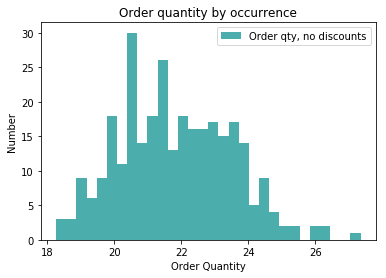

In [62]:
hist_plot1_qty(sampling_no_disc_mean, label="Order qty, no discounts", xlim=None)


In [63]:
sampling_w_disc_mean, sampling_w_disc_std = sampling_mean(df_disc.OrderQty)
print(np.mean(sampling_w_disc_mean))
print(np.std(sampling_w_disc_std))


27.115033333333333
2.2973273950774518


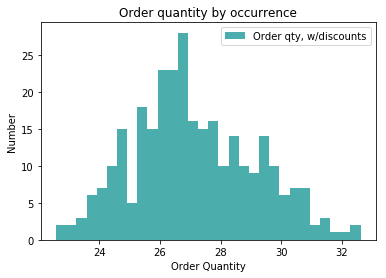

In [64]:
hist_plot1_qty(sampling_w_disc_mean, label="Order qty, w/discounts", xlim=None)


Same histograms as above, but plotted on one figure

Distribution of resampling means, average order quantity,                   non-discounted products vs. discounted products


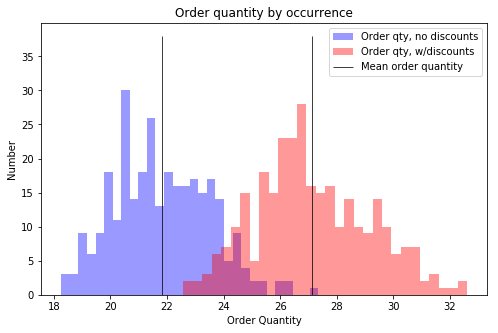

In [65]:
print("Distribution of resampling means, average order quantity,                   non-discounted products vs. discounted products")
plt.figure(figsize=(8, 5))
hist_plot2_qty(sampling_no_disc_mean, sampling_w_disc_mean, label="Order qty, no discounts", label1="Order qty, w/discounts", xlim=None, print_vlines=True)


### Barlett's Test for variance

The t-test performed above requires not only that the samples come from approximately normally distributed populations, but also that they come from populations that have approximately equal variances.  We use Bartlett’s test on normal populations to test the null hypothesis that the samples are from populations with equal variances. 

In [66]:
import scipy.stats

scipy.stats.bartlett(sampling_no_disc_mean, sampling_w_disc_mean)

BartlettResult(statistic=9.505206184958995, pvalue=0.0020488973478317313)

When the p-value is > 0.05, we **_cannot_** reject the null hypothesis that the samples come from populations with similar or equal variances.  

One interesting point is that there appears to be more fluctuation in terms of means and distributions for order quantities than for order revenues (presumably because the revenue numbers are much larger than the quantity numbers).  Sometimes the distributions that result from resampling pass the Bartlett test, and sometimes they don't.  One thing that seems fairly consistent, though, is that the distributions are reasonably normal and the shapes for each are similar--meaning that it the distributions might not always pass Bartlett's test, but when they don't, they aren't so very far off the mark.  

Because of this, I would still like to run the t-test to find out what results we get.

### T-test for two independent samples

In [67]:
import scipy.stats as scs

scs.ttest_ind(sampling_no_disc_mean, sampling_w_disc_mean)

Ttest_indResult(statistic=-34.83196846645165, pvalue=4.977700996452371e-146)

The p-value is <<< 0.05, so if the other conditions for this test (normality, similar variances) are met, we **should reject the null hypothesis** that the samples come from populations with the same means.  Now, depending on the particular samples that are pulled when the model is run, the distributions may or may not pass Bartlett's test.  If we do not pass Bartlett's test on a particular running of the model, we can take a look at the distributions to see how similar or dissimilar they are to each other and figure out if an alterative test would be better.

If we decide to perform this test and we get a p-value of << 0.05, then it's likely that there is an actual statistically significant difference between the populations that is not due to chance.  But what is the effect size of that difference?  Enter Cohen's d.

### Effect size:  Cohen's d

Cohen's d allows us to view the magnitude of the effect of a statistically significant difference.  From the "Trending Sideways:  Practical Engineering and Statistics Updates" blog page, Cohen’s d is "simply a measure of the distance between two means, measured in standard deviations."  So, we could expect that the majority of analyses will yield Cohen's d results in a range from 0 to 3 or 4 (representing the differences between two means in terms of standard deviations).  

In [68]:
# From learn.co Section 20 Effect Size lesson, with conditional print statements added

def Cohen_d(group1, group2, print_stmt=True):

    # Compute Cohen's d.

    # group1: Series or NumPy array  ----> in this case, the array is the list of sample means from resampling
    # group2: Series or NumPy array  ----> in this case, the array is the list of sample means from resampling

    # returns a floating point number 

    diff = group1.mean() - group2.mean()

    n1, n2 = len(group1), len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    
    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)
    
    if print_stmt:           # changing print_stmt argument in the function call to False will turn off these print statements
        if abs(d) >= 0 and abs(d) < .4:
            print(f"This Cohen's d result ({round(d, 8)}) represents a difference of {round(d, 2)} pooled standard deviations between the two groups, and suggests a **small** effect size.")
        elif abs(d) >= .4 and abs(d) < .7:
            print(f"This Cohen's d result ({round(d, 8)}) represents a difference of {round(d, 2)} pooled standard deviations between the two groups, and suggests a **medium** effect size.")
        else:
            print(f"This Cohen's d result ({round(d, 8)}) represents a difference of {round(d, 2)} pooled standard deviations between the two groups, and suggests a **large** effect size.")
    
    return d

In [69]:
group1 = np.array(sampling_w_disc_mean)
group2 = np.array(sampling_no_disc_mean)

d = Cohen_d(group1, group2)
d


This Cohen's d result (2.84877023) represents a difference of 2.85 pooled standard deviations between the two groups, and suggests a **large** effect size.


2.8487702296001456

The functions below allow the creation of plots showing the overlap of two randomly generated normal distributions look like at a given Cohen's d.  Following each pair's Cohen's d result is a visualization of the amount of overlap the given Cohen's d provides.  The functions below are adapted from the Effect Sizes lesson in Section 20 of Module 2 of the Flatiron Full-Time Online Data Science Bootcamp.

In [70]:
def evaluate_PDF(var, x=4):
    '''Input: a random variable object, standard deviation
       output : x and y values for the normal distribution
       '''
    
    # Identify the mean and standard deviation of random variable 
    mean = var.mean()
    std = var.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)
    
    # Calculate the peak of normal distribution i.e. probability density. 
    ys = var.pdf(xs)

    return xs, ys # Return calculated values

def plot_pdfs(cohen_d=2):
    """Plot randomly generated, normally distributed PDFs for 
    distributions that differ by some number of stds.
    
    cohen_d: number of standard deviations between the means
    """
    group1 = scipy.stats.norm(cohen_d,  1)
    group2 = scipy.stats.norm(0, 1)
    xs, ys = evaluate_PDF(group1)
    plt.fill_between(xs, ys, label='Group1', color='#ff2289', alpha=0.7)

    xs, ys = evaluate_PDF(group2)
    plt.fill_between(xs, ys, label='Group2', color='#376cb0', alpha=0.7)



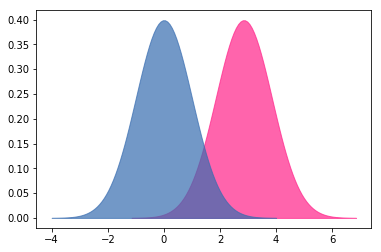

In [71]:
plot_pdfs(d)

Red = group1 = all discounted products;  
Blue = group2 = all non-discounted products

This graph provides a way to visualize the difference of the means, as provided by the Cohen's d test result.  Cohen's d is a measure of the distance between the means, depicted in units of pooled standard deviation.  In this case, 

## Findings and interpretation of test results for Question 1

### Finding
There is a statistically significant difference in the **_quantity of products per order for non-discounted products vs. discounted products._**

### Guidelines for interpreting Cohen's d

Cohen offered basic guidelines for interpreting the result of his test (along with a caution not to simply mindlessly apply the guidance, but to evaluate it in the larger context of the field of analysis).  

In general, d = 0.2 would be considered a small effect, 0.5 a medium effect, and 0.8 or above a large effect.  In the function above, I have included conditional print statments to accompany the result of running the function.

#### Sign matters when interpreting Cohen's d

Note that Cohen's d can be positive or negative, depending on which dataset is assigned to group1 and which to group2.  In the Cohen's d calculation in the previous cell:
- 'group1' contained the distribution of means from resampling of the dataset containing only revenues from discounted products, and 
- 'group2' contained the distribution of means from resampling of the dataset containing revenues only from non-discounted products.  

### In conclusion
A positive Cohen's d tells us that the means in the **order quantities from discounted products** are d pooled standard deviations higher than the means from the **order quantities from non-discounted products.**

# Second question:  Revenues and discount / no discount

Do discounts result in a statistically significant effect on **_per-order revenue_**?


## Null and alternative hypotheses

-  **Null hypothesis:** No statistically significant difference between the means of _**per-order revenues**_ resulting from discounts and per-order revenues from non-discounted products
    -  Ho:  $\mu_1 = \mu_2$

-  **Alternative hypothesis:**  There are statistically significant differences between the means of revenues resulting from discounts and revenues from non-discounted products that are unlikely to be due to chance
    -  Ha:  $\mu_1 \neq \mu_2$

## EDA

Before proceding, we need to add a "Revenue" column

### Add Revenue, Revenue Percentage, and Revenue Fraction (revenue per row divided by total revenues)


In [72]:
# Add Revenue, Revenue Percentage, and Revenue Fraction (actual revenue per row divided by total revenues)

def add_rev_col():
    
    # add a revenue column
    df["Revenue"] = df["OrderUnitPrice"] * (1 - df["Discount"]) * df["OrderQty"]
        
    # add columns showing percentage / fraction of total revenue 
    df["RevPercentTotal"] = (df["Revenue"] / df["Revenue"].sum())*100  
    df["RevFractionTotal"] = (df["Revenue"] / df["Revenue"].sum())  
    
    return df


In [73]:
df = add_rev_col()
df.head()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
1,10294,RATTC,2012-08-30,1,14.4,18,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",259.2,0.020477,0.000205
2,10317,LONEP,2012-09-30,1,14.4,20,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",288.0,0.022753,0.000228
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
4,10354,PERIC,2012-11-14,1,14.4,12,0.00,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",172.8,0.013652,0.000137


### Create sub-dataframes -- all sales; non-discounted product sales; discounted products sales

In [74]:
total_revenue = df.loc[df.Discount >= 0.00]
revenue_no_discount = df.loc[df.Discount == 0.00]
revenue_all_discounts = df.loc[df.Discount >=0.01]

In [75]:
total_revenue.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.2,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
1,10294,RATTC,2012-08-30,1,14.4,18,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",259.2,0.020477,0.000205
2,10317,LONEP,2012-09-30,1,14.4,20,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",288.0,0.022753,0.000228


In [76]:
revenue_no_discount.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
1,10294,RATTC,2012-08-30,1,14.4,18,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",259.2,0.020477,0.000205
2,10317,LONEP,2012-09-30,1,14.4,20,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",288.0,0.022753,0.000228
4,10354,PERIC,2012-11-14,1,14.4,12,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",172.8,0.013652,0.000137


In [79]:
revenue_all_discounts.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
5,10370,CHOPS,2012-12-03,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145


###  Create visualization functions

In [80]:
# Functions for plotting

def hist_plot1(series1, label=None, color='darkcyan', alpha=0.7, bins=50, xlim=[0, 3500], fontsize=12, print_stmt=True):
    plt.hist(series1, label=label, color=color, alpha=alpha, bins=bins)
    plt.title(f"Revenue amounts by occurrence (xlim = {xlim})")
    plt.xlabel("Revenue")
    plt.ylabel("Number")
    plt.legend(loc="best")
    plt.xlim(xlim)
    plt.show()
    if print_stmt:
        print(f"Total revenues (discount and no discount):  {int(total_revenue.Revenue.sum())}")
        print(f"Total revenues from all discounted products:  {int(revenue_all_discounts.Revenue.sum())}")
        print(f"Percentage of total revenue from discounts:  {round((revenue_all_discounts.Revenue.sum()/total_revenue.Revenue.sum())*100, 3)}%")

def hist_plot2(series1, series2, label=None, label1=None, color1='b', color2='r', alpha=0.4, bins=100, xlim=[0, 3500], ylim=None,  fontsize=16):
    plt.hist(series1, label=label, color=color1, alpha=alpha, bins=bins)
    plt.hist(series2, label=label1, color=color2, alpha=alpha, bins=bins)
    plt.title(f"Revenue amounts by occurrence (xlim = {xlim})")
    plt.xlabel("Revenue")
    plt.ylabel("Number")
    plt.legend(loc='best')
    plt.xlim(xlim)  
    plt.ylim(ylim)
    plt.show()

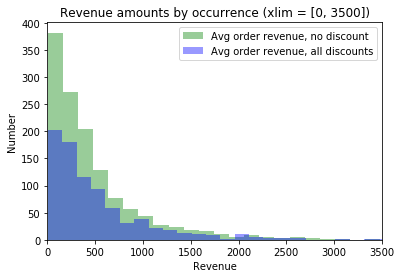

In [81]:
hist_plot2(revenue_no_discount.Revenue, revenue_all_discounts.Revenue, label="Avg order revenue, no discount", label1="Avg order revenue, all discounts", color1='g', color2='b', xlim=[0, 3500])


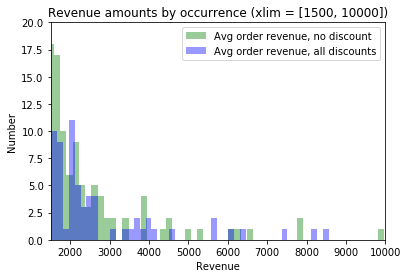

In [82]:
hist_plot2(revenue_no_discount.Revenue, revenue_all_discounts.Revenue, label="Avg order revenue, no discount", label1="Avg order revenue, all discounts", color1='g', color2='b', xlim=[1500, 10000], ylim=[0,20])


The histogram shows the distribution of revenue values (x-axis).  The distribution of both revenues without discounts and all revenues coming from discounts appear very similar, with the smallest order amounts appearing most frequently (far left hand side of graph) and the highest revenue order amounts appearing at the far right.  

If discounts have an effect on sales revenues, we would expect to see the distribution of revenues from discounts look different from the distribution of revenues due to sales that didn't involve discounts.  If the shape of the distribution changes, such that a greater proportion of revenues appear in the middle or far right-hand-side of the graph, then that difference in distribution suggests that discounts actually increase revenues (since higher revenues would occur more frequently in that distribution than in the no-discount distribution).  

## Testing for significance:  sampling, test setup and results 

As for question one, we'd like to perform a two-sided two-sample test.  We need to check for normality and check variances between the two distributions.  

### Test chosen:  t-test (2-sided, 2-sample) 
We can see that the above distributions are not normal.  As we did for Question 1, we will perform resampling for each dataset to obtain a reasonaly normal distribution of means.  


Each time the cells below are run, 100 samples are taken 300 times for each of the two populations (revenues from no discounts, revenues from all discounts).  The mean and standard deviation are computed for each of the 300 sampling events, and each of the resulting means and standard deviations is appended to the respective relevant list.  


### Sampling to obtain normal distribution of means

In [83]:
# using sampling_mean(var, sampling_events=300, size=100) function from Question 1

sampling_no_disc_mean, sampling_no_disc_std = sampling_mean(revenue_no_discount.Revenue)
print(np.mean(sampling_no_disc_mean))
print(np.std(sampling_no_disc_std))

574.3363353333333
357.42529168808034


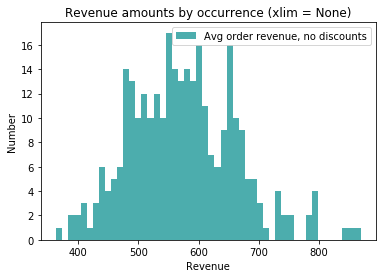

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [84]:
hist_plot1(sampling_no_disc_mean, label="Avg order revenue, no discounts", xlim=None)


In [85]:
sampling_w_disc_mean, sampling_w_disc_std = sampling_mean(revenue_all_discounts.Revenue)
print(np.mean(sampling_w_disc_mean))
print(np.std(sampling_w_disc_std))


618.88457225
361.86568183075394


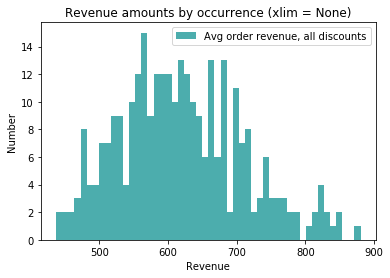

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [86]:
hist_plot1(sampling_w_disc_mean, label="Avg order revenue, all discounts", xlim=None)


### Barlett's Test for variance

The t-test performed above requires not only that the samples come from approximately normally distributed populations, but also that they come from populations that have approximately equal variances.  We use Bartlett’s test on normal populations to test the null hypothesis that the samples are from populations with equal variances. 

In [140]:
import scipy.stats

scipy.stats.bartlett(sampling_no_disc_mean, sampling_w_disc_mean)

BartlettResult(statistic=0.10546064520693377, pvalue=0.7453725236416192)

The p-value is > 0.05, so we **_cannot reject the null hypothesis_** that the samples come from populations with similar or equal variances.  Therefore, the null hypothesis that the variances of the two data set populations are approximately equal.

### T-test for two independent samples

In [88]:
import scipy.stats as scs

scs.ttest_ind(sampling_no_disc_mean, sampling_w_disc_mean)

Ttest_indResult(statistic=-6.109320050486452, pvalue=1.803493849874924e-09)

The p-value is << 0.05, so we **should reject the null hypothesis** that the samples come from populations with the same means.  Therefore, we can say that it's unlikely that the differences in sample means from one dataset to another are due to random chance.  

So, it's likely that there is an actual statistically significant difference between the two populations.  But what is the effect size of that difference?  Enter Cohen's d.

### Effect size:  Cohen's d

Using function from Cohen's d section in Question 1:

In [89]:
group1 = np.array(sampling_w_disc_mean)
group2 = np.array(sampling_no_disc_mean)

Cohen_d(group1, group2)

This Cohen's d result (0.49965735) represents a difference of 0.5 pooled standard deviations between the two groups, and suggests a **medium** effect size.


0.49965735068024486

Using evaluate_PDF and plot_pdfs functions defined in Question 1:  

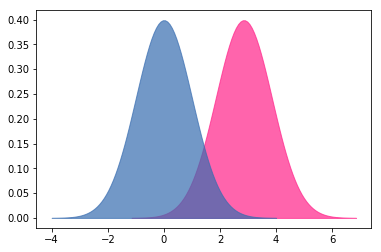

In [90]:
plot_pdfs(d)

Red = all discounted products; 
Blue = all non-discounted products

This graph provides a way to visualize the difference of the means, as provided by the Cohen's d test result.  Cohen's d is a measure of the distance between the means, depicted in units of pooled standard deviation.  In this case, 

## Findings and interpretation of test results for Question 2

### Findings
There is a statistically significant difference in the _**average revenues per order**_ for non-discounted products vs. discounted products.  The _average revenue per order was **higher** when discounts were present_ than when discounts were not present. 

### Guidelines for interpreting Cohen's d

As described in the Cohen's d section in Question 1 above, Cohen suggested rules of thumb for how to interpret Cohen's d.  In general, d = 0.2 would be considered a small effect, 0.5 a medium effect, and 0.8 or above a large effect.  

#### Sign matters when interpreting Cohen's d

Note that Cohen's d can be positive or negative, depending on which dataset is assigned to group1 and which to group2.  In the Cohen's d calculation in the previous cell:
- 'group1' contained the distribution of means from resampling of the dataset containing only revenues from discounted products, and 
- 'group2' contained the distribution of means from resampling of the dataset containing revenues only from non-discounted products.  

### In Conclusion

A positive Cohen's d from this ordering tells us that the means in the **revenues from discounted products are d pooled standard deviations higher** than the means from the revenues from non-discounted products.  

# Third question:  Per-order quantity vs. level of discount

Does the discount **_level_** (e.g., 5%, 10%, 15%...) affect the **_average order quantity_**?

While we were able to reject the null hypothesis in the first question (that order quantities are the same whether products are discounted or not), we should dig a bit deeper to find out whether some discount levels result in a greater quantities per order than others. 

## Null and alternative hypotheses for third question 

-  **Null hypothesis:**  No significant difference among the means of **product order quantities** from the various discount values 

    -  Ho:  $\mu_1 = \mu_2 = \mu_3 ... = \mu_i$)


-  **Alternative hypothesis:** Differences among the means of product order quantities resulting from various discount values are unlikely to be due to chance  

    -  Ha:  $\mu_1 \neq \mu_2 \neq \mu_3 \neq ... \neq \mu_i$

## EDA

###  Create sub-dataframes for discount levels

In [152]:
# Create dataframes with different discount levels (1-5%, 5-10%, 10-15%, 15-20%, and 20% and up)
    
def create_disc_dfs():
    '''
    This function creates dataframes for each category of discount in 5% increments, up to 
    20% (which is represented as 20% and up).  The function creates the dataframes 
    for future use.  
    '''
    
    df_disc_01to05 = df.loc[(df["Discount"] >= .01) & (df["Discount"] < .05)]
    df_disc_05to10 = df.loc[(df["Discount"] >= .05) & (df["Discount"] < .10)]
    df_disc_10to15 = df.loc[(df["Discount"] >= .10) & (df["Discount"] < .15)]
    df_disc_15to20 = df.loc[(df["Discount"] >= .15) & (df["Discount"] < .2)]
    df_disc_20andup = df.loc[df["Discount"] >= .20]
    return df_disc_01to05, df_disc_05to10, df_disc_10to15, df_disc_15to20, df_disc_20andup

# when running this function, run the following line to extract all of the dataframes:
# df_disc_01to05, df_disc_05to10, df_disc_10to15, df_disc_15to20, df_disc_20andup = create_disc_dfs()


In [153]:
df_disc_01to05, df_disc_05to10, df_disc_10to15, df_disc_15to20, df_disc_20andup = create_disc_dfs()


_Uncomment the lines in each of the cells below to see the top 5 rows of the dataframe and
info on the dataframe columns and datatypes_

In [154]:
df_disc_01to05.head(3)
# rev_disc_01to05.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
135,11077,RATTC,2014-05-06,6,25.00,1,0.02,Grandma's Boysenberry Spread,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",24.5000,0.001936,0.000019
329,11077,RATTC,2014-05-06,14,23.25,1,0.03,Tofu,7,Produce,Dried fruit and bean curd,22.5525,0.001782,0.000018
378,11077,RATTC,2014-05-06,16,17.45,2,0.03,Pavlova,3,Confections,"Desserts, candies, and sweet breads",33.8530,0.002674,0.000027


In [155]:
df_disc_05to10.head(3)
# rev_disc_05to10.info()


,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
26,10905,WELLI,2014-02-24,1,18.0,20,0.05,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",342.00,0.027019,0.000270
54,10632,WANDK,2013-08-14,2,19.0,30,0.05,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",541.50,0.042780,0.000428
61,10787,LAMAI,2013-12-19,2,19.0,15,0.05,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",270.75,0.021390,0.000214


In [156]:
df_disc_10to15.head(3)
# rev_disc_10to15.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
33,11025,WARTH,2014-04-15,1,18.0,10,0.1,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",162.0,0.012798,0.000128
50,10485,LINOD,2013-03-25,2,15.2,20,0.1,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",273.6,0.021615,0.000216
84,10485,LINOD,2013-03-25,3,8.0,20,0.1,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",144.0,0.011376,0.000114


In [157]:
df_disc_15to20.head(3)
# rev_disc_15to20.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
5,10370,CHOPS,2012-12-03,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
10,10526,WARTH,2013-05-05,1,18.0,8,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",122.4,0.009670,0.000097


In [158]:
df_disc_20andup.head(3)
# rev_disc_20andup.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
9,10522,LEHMS,2013-04-30,1,18.0,40,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",576.0,0.045505,0.000455
16,10646,HUNGO,2013-08-27,1,18.0,15,0.25,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",202.5,0.015998,0.000160


In [159]:
df_disc_10to15.head(3)
# rev_disc_10to15.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
33,11025,WARTH,2014-04-15,1,18.0,10,0.1,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",162.0,0.012798,0.000128
50,10485,LINOD,2013-03-25,2,15.2,20,0.1,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",273.6,0.021615,0.000216
84,10485,LINOD,2013-03-25,3,8.0,20,0.1,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",144.0,0.011376,0.000114


In [160]:
df_disc_15to20.head(3)
# rev_disc_15to20.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
5,10370,CHOPS,2012-12-03,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
10,10526,WARTH,2013-05-05,1,18.0,8,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",122.4,0.009670,0.000097


In [161]:
df_disc_20andup.head(3)
# rev_disc_20andup.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
9,10522,LEHMS,2013-04-30,1,18.0,40,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",576.0,0.045505,0.000455
16,10646,HUNGO,2013-08-27,1,18.0,15,0.25,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",202.5,0.015998,0.000160


In [162]:
df_disc_05to10.groupby(['CategoryName']).count()  # shows sample size for each category


,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
CategoryName,,,,,,,,,,,,,
Beverages,26,26,26,26,26,26,26,26,26,26,26,26,26
Condiments,19,19,19,19,19,19,19,19,19,19,19,19,19
Confections,29,29,29,29,29,29,29,29,29,29,29,29,29
Dairy Products,41,41,41,41,41,41,41,41,41,41,41,41,41
Grains/Cereals,17,17,17,17,17,17,17,17,17,17,17,17,17
Meat/Poultry,17,17,17,17,17,17,17,17,17,17,17,17,17
Produce,11,11,11,11,11,11,11,11,11,11,11,11,11
Seafood,26,26,26,26,26,26,26,26,26,26,26,26,26


### Visualizations

#### Summary of quantities by level of discount

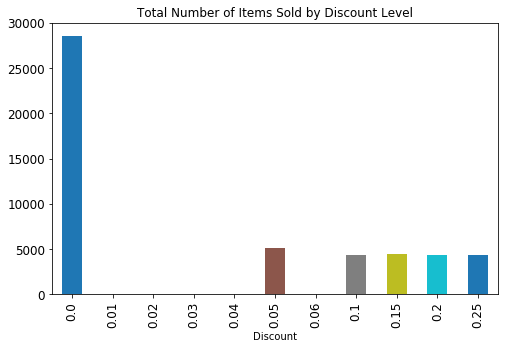

In [163]:
df.groupby('Discount')['OrderQty'].sum().plot(kind='bar', 
            title ="Total Number of Items Sold by Discount Level", figsize=(8, 5), fontsize=12)
plt.show()


Around 28,500 product units sold (approximately 55%) were not discounted, whereas approximately 23,000 (around 45%) product units were sold at a discount.  Of these ~23,000 product units sold at a discount, product units sold at a 5% discount comprised the largest subset at just over 5000 units sold at this discount level.  The remaining four discount levels--10%, 15%, 20%, and 25%--represent almost identical unit sales of approximately 4500 units each.  

#### Visualizations of order quantities versus levels of discounts
As in the first case, we can create some initial visualizations to see if different discount levels result in differences in average order quantities.  

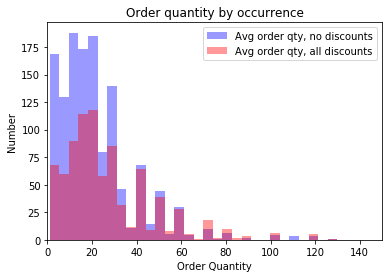

In [164]:
hist_plot2_qty(df_no_disc.OrderQty, df_disc.OrderQty, label="Avg order qty, no discounts",  label1="Avg order qty, all discounts")


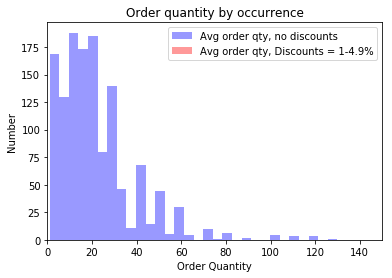

In [165]:
hist_plot2_qty(df_no_disc.OrderQty, df_disc_01to05.OrderQty, label="Avg order qty, no discounts",  label1="Avg order qty, Discounts = 1-4.9%", xlim=([0,150]))

# there are very few data points in the df_disc_01to05 category; going forward, I will delete this one.

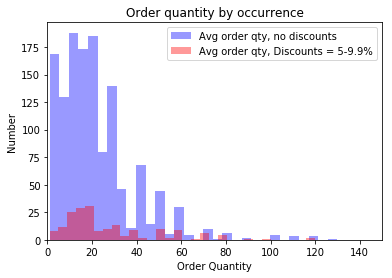

In [166]:
hist_plot2_qty(df_no_disc.OrderQty, df_disc_05to10.OrderQty, label="Avg order qty, no discounts",  label1="Avg order qty, Discounts = 5-9.9%", xlim=([0,150]))


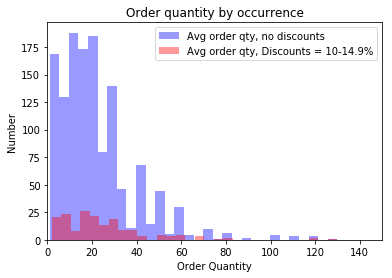

In [167]:
hist_plot2_qty(df_no_disc.OrderQty, df_disc_10to15.OrderQty, label="Avg order qty, no discounts",  label1="Avg order qty, Discounts = 10-14.9%", xlim=([0,150]))


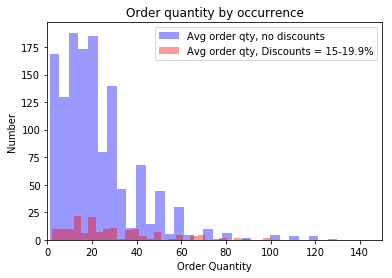

In [168]:
hist_plot2_qty(df_no_disc.OrderQty, df_disc_15to20.OrderQty,  label="Avg order qty, no discounts",  label1="Avg order qty, Discounts = 15-19.9%", xlim=([0,150]))


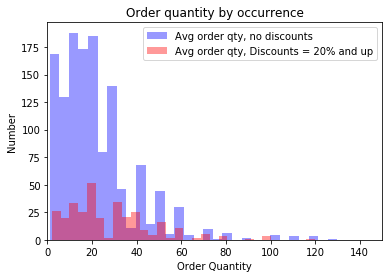

In [169]:
hist_plot2_qty(df_no_disc.OrderQty, df_disc_20andup.OrderQty,  label="Avg order qty, no discounts",  label1="Avg order qty, Discounts = 20% and up", xlim=([0,150]))


In [171]:
def hist_plot4(series1, series2, series3, series4, label=None, label1=None, label2=None, label3=None, color1='b', color2='r', color3='g', alpha=0.4, bins=40, xlim=None, ylim=None,  fontsize=12):
    plt.hist(series1, label=label, color=color1, alpha=alpha, bins=bins)
    plt.hist(series2, label=label1, color=color2, alpha=alpha, bins=bins)
    plt.hist(series3, label=label2, alpha=alpha, bins=bins)
    plt.hist(series4, label=label3, alpha=alpha, bins=bins)
    plt.title(f"OrderQty by occurrence (xlim = {xlim}, bins = {bins})", fontsize=fontsize)
    plt.xlabel("Order Quantity", fontsize=fontsize)
    plt.ylabel("Number of orders at given quantity", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(loc='best', fontsize=12)
    plt.xlim(xlim)  
    plt.ylim(ylim)
    plt.show()

In [172]:
def hist_plot5(series1, series2, series3, series4, series5, label=None, label1=None, label2=None, label3=None, label4=None, color1='b', color2='r', color3='g', alpha=0.4, bins=40, xlim=None, ylim=None,  fontsize=12):
    plt.hist(series1, label=label, color=color1, alpha=alpha, bins=bins)
    plt.hist(series2, label=label1, color=color2, alpha=alpha, bins=bins)
    plt.hist(series3, label=label2, alpha=alpha, bins=bins)
    plt.hist(series4, label=label3, alpha=alpha, bins=bins)
    plt.hist(series5, label=label4, alpha=alpha, bins=bins)
    plt.title(f"Order Quantity by occurrence (xlim = {xlim}, bins = {bins})", fontsize=fontsize)
    plt.xlabel("Order Quantity", fontsize=fontsize)
    plt.ylabel("Number of orders at given quantity", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(loc='best', fontsize=12)
    plt.xlim(xlim)  
    plt.ylim(ylim)
    plt.show()

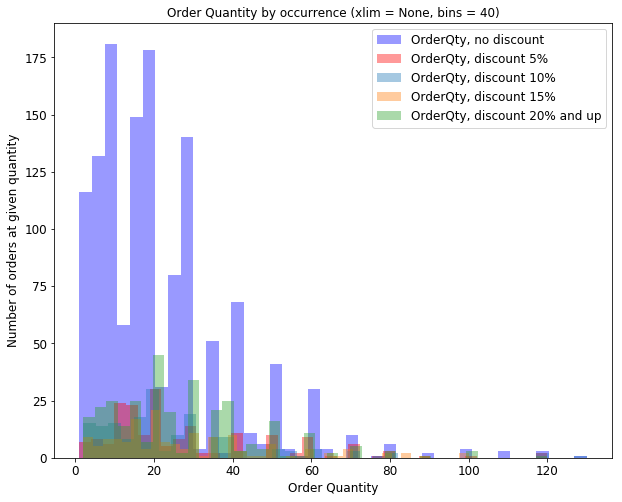

In [173]:
plt.figure(figsize=(10,8))
hist_plot5(df_no_disc.OrderQty, df_disc_05to10.OrderQty, df_disc_10to15.OrderQty, df_disc_15to20.OrderQty, df_disc_20andup.OrderQty, label='OrderQty, no discount', label1='OrderQty, discount 5%', label2='OrderQty, discount 10%', label3='OrderQty, discount 15%', label4='OrderQty, discount 20% and up', xlim=None)



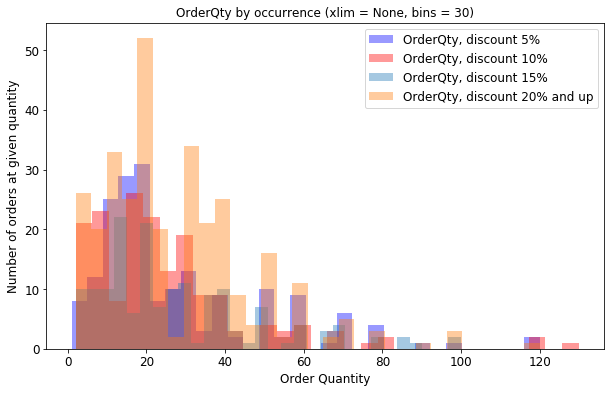

In [174]:
plt.figure(figsize=(10,6))
hist_plot4(df_disc_05to10.OrderQty, df_disc_10to15.OrderQty, df_disc_15to20.OrderQty, df_disc_20andup.OrderQty, label='OrderQty, discount 5%', label1='OrderQty, discount 10%', label2='OrderQty, discount 15%', label3='OrderQty, discount 20% and up', bins=30, xlim=None)



## Testing for significance:  sampling, test setup and results 
A review of the histogram plots for order quantities deriving from various discount levels shows that, much like the overall order quantity frequency histograms, the histograms of these revenue-from-discount subsets reveal non-normally distributed data.  To run the statistical tests needed to test the hypotheses in the second question, I will perform multiple sampling of the datasets, then performing statistical tests on the distribution of the means.  Per the Central Limit Theorem, these distributions should be approximately normal, and so can be used for other tests (specifically Tukey's test).

### First test chosen:  ANOVA

This test will tell us that at least one of the datasets is significantly different than the others.  (It doesn't tell us which one, though.)

As with the t-test above, I will first perform resampling and create distributions of the means of these resampling events to form approximately normal distributions to perform the ANOVA test.

### Multiple sampling of datasets to obtain normal distribution of means


The mean of the distribution is 21.7
The std deviation of the distribution is 2.29


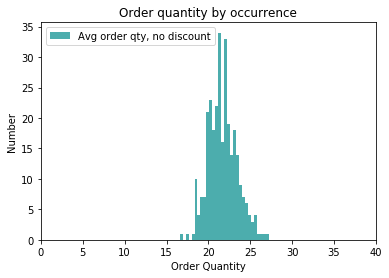

In [175]:
no_discounts = sampling_mean(revenue_no_discount.OrderQty)
print(f"The mean of the distribution is {round(np.mean(no_discounts[0]), 2)}")
print(f"The std deviation of the distribution is {round(np.std(no_discounts[1]), 2)}")
hist_plot1_qty(no_discounts[0],  label="Avg order qty, no discount", xlim=([0, 40]))


The mean of the distribution is 27.03
The std deviation of the distribution is 2.23


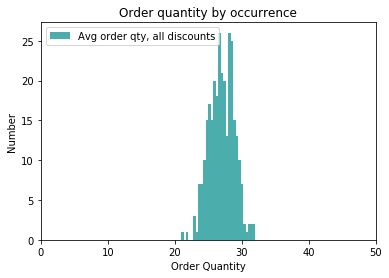

In [176]:
all_discounts = sampling_mean(revenue_all_discounts.OrderQty)
print(f"The mean of the distribution is {round(np.mean(all_discounts[0]), 2)}")
print(f"The std deviation of the distribution is {round(np.std(all_discounts[1]), 2)}")
hist_plot1_qty(all_discounts[0], label="Avg order qty, all discounts", xlim=([0, 50]))


In [177]:
# testing that function results can be plugged into ttest_ind

scs.ttest_ind(no_discounts[0], all_discounts[0])

Ttest_indResult(statistic=-36.227694401053455, pvalue=5.874554912721977e-153)

##### Sub-dataframes based on revenues from a given discount level

As a reminder, here are the dataframes I've built so far:
-  total_revenue -- Total revenues, with **and** without discounts
-  revenue_no_discount -- All revenues resulting from sales of **non**-discounted products
-  revenue_all_discounts -- All revenues resulting from sales of products at **all** discount levels
-  df_disc_01to05.Revenue -- Products discounted 1-4.9%
-  df_disc_05to10.Revenue -- Products discounted 5-9.9%
-  df_disc_10to15.Revenue -- Products discounted 10-14.9%
-  df_disc_15to20.Revenue -- Products discounted 15-19.9%
-  df_disc_20andup.Revenue -- Products discounted 20% or more

In [178]:
total_rev_means = sampling_mean(total_revenue.OrderQty)
np.mean(total_rev_means[0]), np.std(total_rev_means[1])


(23.7839, 2.222170319218314)

In [179]:
revs_no_disc_means = sampling_mean(revenue_no_discount.OrderQty)
np.mean(revs_no_disc_means[0]), np.std(revs_no_disc_means[1])

(21.737666666666666, 2.2045942889680585)

In [180]:
revs_all_disc_means = sampling_mean(revenue_all_discounts.OrderQty)
np.mean(revs_all_disc_means[0]), np.std(revs_all_disc_means[1])

(27.21493333333333, 2.2267119686360846)

**Note**--I'm not including revenues from 1-4.9% discounts because there are only 7 data points--not enough revenue points in this sample to compute these statistics

In [181]:
df_5to10_disc_means = sampling_mean(df_disc_05to10.OrderQty)
np.mean(df_5to10_disc_means[0]), np.std(df_5to10_disc_means[1])

(27.861800000000002, 1.732217246181339)

In [182]:
df_10to15_disc_means = sampling_mean(df_disc_10to15.OrderQty)
np.mean(df_10to15_disc_means[0]), np.std(df_10to15_disc_means[1])

(25.273500000000002, 2.0985948411905637)

In [183]:
df_15to20_disc_means = sampling_mean(df_disc_15to20.OrderQty)
np.mean(df_15to20_disc_means[0]), np.std(df_15to20_disc_means[1])

(28.2597, 1.157680428602865)

In [184]:
df_20andup_disc_means = sampling_mean(df_disc_20andup.OrderQty)
np.mean(df_20andup_disc_means[0]), np.std(df_20andup_disc_means[1])

(27.590533333333333, 1.6990208660705712)

### One-way ANOVA test using scipy.stats:
 
scipy.stats.f_oneway(*args)

A p-value of < $\alpha$ (0.05) signifies that there is a < 5% chance that we would see the differences we would observe among the sample means distributions.  A p-value of >= 0.05 signifies that there is a greater than 5% chance (p-value probability) that the differences observed among the distributions is due to chance.  

In [185]:
scs.f_oneway(revs_no_disc_means[0], df_5to10_disc_means[0], df_10to15_disc_means[0], df_15to20_disc_means[0], df_20andup_disc_means[0])


F_onewayResult(statistic=982.073775590023, pvalue=0.0)

The extremely low p-value of the ANOVA test tell us that we should reject the null hypothesis (that there is no statistically significant difference between the distributions of means) and strongly suggests that at least one of the distributions of means differs signficantly from at least one other.  

Because ANOVA doesn't tell us which variables differ from others, I'll run Tukey's test to find out.

### Second test chosen:  Tukey's Range Test

This test can tell us which variables are significantly different from one another.  

Per the codeacademy Hypothesis Testing presentation by Hillary Green-Lerman, three things are required for pairwise_tukeyhsd:
1. A vector of all data (concatenated using np.concatenate)
2. A vector of labels for the data
3. A level of significance (usually 0.05)


In [186]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [187]:
no_disc = np.array(revs_no_disc_means[0])           # the number of means in these lists 
disc_05to10 = np.array(df_5to10_disc_means[0])    # equals the sampling events input to 
disc_10to15 = np.array(df_10to15_disc_means[0])  # the sampling function that was run to 
disc_15to20 = np.array(df_15to20_disc_means[0])   # obtain this data
disc_20andup = np.array(df_20andup_disc_means[0])

v = np.concatenate([no_disc, disc_05to10, disc_10to15, disc_15to20, disc_20andup])
labels = ['no_disc'] * len(no_disc) + ['disc_05to10'] * len(disc_05to10) + ['disc_10to15'] * len(disc_10to15) + ['disc_15to20']*len(disc_15to20) + ['disc_20andup']*len(disc_20andup)
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

type(tukey_results)


    Multiple Comparison of Means - Tukey HSD,FWER=0.05   
   group1       group2    meandiff  lower   upper  reject
---------------------------------------------------------
disc_05to10  disc_10to15  -2.5883  -2.9241 -2.2525  True 
disc_05to10  disc_15to20   0.3979   0.0621  0.7337  True 
disc_05to10  disc_20andup -0.2713  -0.6071  0.0645 False 
disc_05to10    no_disc    -6.1241  -6.4599 -5.7883  True 
disc_10to15  disc_15to20   2.9862   2.6504  3.322   True 
disc_10to15  disc_20andup  2.317    1.9812  2.6528  True 
disc_10to15    no_disc    -3.5358  -3.8716   -3.2   True 
disc_15to20  disc_20andup -0.6692   -1.005 -0.3334  True 
disc_15to20    no_disc     -6.522  -6.8578 -6.1862  True 
disc_20andup   no_disc    -5.8529  -6.1887 -5.5171  True 
---------------------------------------------------------


statsmodels.sandbox.stats.multicomp.TukeyHSDResults

Once again, for average order quantity (much more so than for average revenues per order), the relatively small number of potential point samples represented by quantity (as opposed to revenues) can result in differences in running these tests from one set of sampling runs to the next.  The first time I ran the sampling function and then ran Tukey's test, every single pairing was found to be significant (True for "reject null hypothesis" for all pairings).  The second time I ran the sampling functions and the tests, the result was to reject the null for all pairs except for disc_05to10 / disc_20andup.  

In any case, what I find is that the average order quantity is statistically significantly different for most, if not all, pairs.  What this means is that each of these distributions of average order quantity by discount level (except for the disc_15ot20 / no_disc pair) is statistically significant different from each other at the 0.05 level.  


### Effect size:  Cohen's d pairwise comparisons and visualization

To find out the effect sizes of the various discount levels, we can run Cohen's d to see which ones are most important.  Except for one pairing, all were significant, so will need to do Cohen's d on each of the other pairs.

This Cohen's d result (1.68934016) represents a difference of 1.69 pooled standard deviations between the two groups, and suggests a **large** effect size.


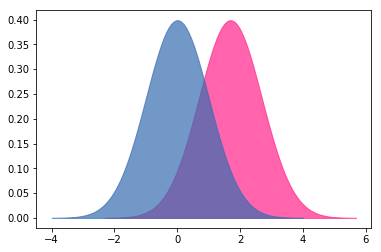

In [188]:
d = Cohen_d(disc_05to10, disc_10to15)
plot_pdfs(d)

Magenta = group1 = disc_05to10 ;   blue = group2 = disc_10to15

The average order quantities from discounts of 5-9.9% are **significantly higher** than the means of revenues from discounts of 10-14.9%.

That is a rather strange outcome; whereas one might expect such a result for revenues, where two somewhat opposing forces are at work (higher discounts might drive customers to purchase more, but at the same time reduce margins for the seller), it is not clear why we would see higher _quantities_ sold for a discount of 5% as opposed to a discount of 10%.  

It could be that Northwind is only offering the larger discounts on more expensive products:  the larger discount might prompt a customer to buy the product (as opposed to not buying it), but might not be enough in and of itself to prompt the customer to buy more units than planned.

This Cohen's d result (-0.27546669) represents a difference of -0.28 pooled standard deviations between the two groups, and suggests a **small** effect size.


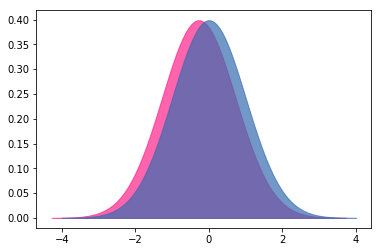

In [189]:
d = Cohen_d(disc_05to10, disc_15to20)
plot_pdfs(d)

Magenta = group1 = disc_05to10 ;   blue = group2 = disc_15to20

The average order quantity on products discounted 5-9.9% is **slightly lower** than is the average order quantity on products discounted 15-19.9%.

Directionally, this result makes sense (the greater the discount, the larger the quantity sold) but some of the same comments I made in the previous pairwise comparison might apply here also.  While in the previous case, perhaps the 10% discount wasn't enough to spur additional quantity buying (but might have induced a customer to buy at least one unit).  But as the discount gets bigger, it might start driving increased quantity purchasing, even on more expensive products.  This might represent a continuum, as seen in the next graph...

This Cohen's d result (0.16737761) represents a difference of 0.17 pooled standard deviations between the two groups, and suggests a **small** effect size.


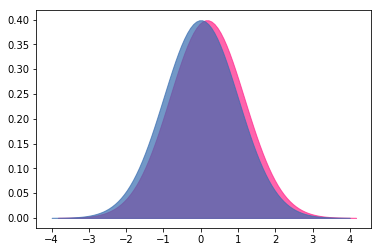

In [190]:
d = Cohen_d(disc_05to10, disc_20andup)
plot_pdfs(d)

# note that this pairing was not found to be statistically significant in Tukey's test.

Magenta = group1 = disc_05to10 ; blue = group2 = disc_20andup

The average order quantity on products discounted 5-9.9% is **slightly higher** than the average order quantity on products discounted 20% and up.  This is somewhat counterintuitive; all things being equal, one would expect to see more product units purchased at a 20%+ discount than at a 5% discount.  However, it is likely that a lot fewer products get the 20%+ discount treatment, so there just isn't as much volume available at that discount level.  It could also be that the larger discounts are relatively more available on more expensive products, and so one might not see as much of an increase in quantity purchased as with lower-cost items.


This Cohen's d result (3.774058) represents a difference of 3.77 pooled standard deviations between the two groups, and suggests a **large** effect size.


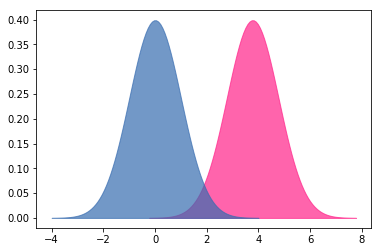

In [191]:
d = Cohen_d(disc_05to10, no_disc)
plot_pdfs(d)

Magenta = group1 = disc_05to10 ;   blue = group2 = no_disc

The the average order quantity on products discounted 5-9.9% are **substantially higher** than the average order quantity from non-discounted products, which is not at all surprising.

This Cohen's d result (-2.26497546) represents a difference of -2.26 pooled standard deviations between the two groups, and suggests a **large** effect size.


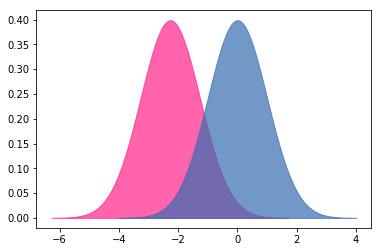

In [192]:
d = Cohen_d(disc_10to15, disc_15to20)
plot_pdfs(d)

Magenta = group1 = disc_10to15 ;   blue = group2 = disc_15to20

The average order quantity on products discounted 10-14.9% is **significantly lower** than the average order quantity on products discounted 15-20%.  This is unsurprising.

This Cohen's d result (-1.53502773) represents a difference of -1.54 pooled standard deviations between the two groups, and suggests a **large** effect size.


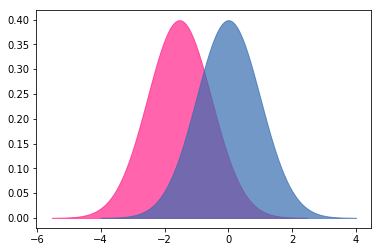

In [193]:
d = Cohen_d(disc_10to15, disc_20andup)
plot_pdfs(d)

Magenta = group1 = disc_10to15 ;   blue = group2 = disc_20andup

The average order quantity on products discounted 10-14.9% is **significantly lower** than the average order quantity on products discounted 20% and up.  Again, unsurprising, and consistent with the previous two Cohen's d results and graphs.

This Cohen's d result (2.33914295) represents a difference of 2.34 pooled standard deviations between the two groups, and suggests a **large** effect size.


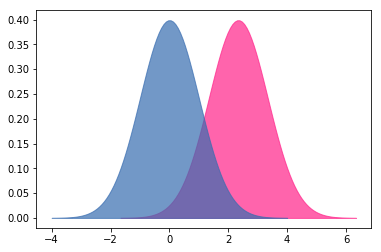

In [194]:
d = Cohen_d(disc_10to15, no_disc)
plot_pdfs(d)

Magenta = group1 = disc_10to15 ;   blue = group2 = no_disc

The average order quantity on products discounted 10-14.9% is **significantly higher** than the average order quantity on non-discounted products.  Again, consistent with the previous findings described above.

This Cohen's d result (0.47112421) represents a difference of 0.47 pooled standard deviations between the two groups, and suggests a **medium** effect size.


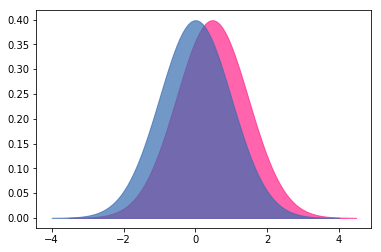

In [195]:
d = Cohen_d(disc_15to20, disc_20andup)  
plot_pdfs(d)

Magenta = group1 = disc_15to20 ;   blue = group2 = disc_20andup

The means of revenues from discounts of 15-19.9% are **slightly lower** than the means of revenues from discounts of 20% and up.

The average order quantity on products discounted 15-19.9% is **somewhat lower** than the average order quantity on products discounted 20% and up.  Again, consistent with the previous findings described above.

This Cohen's d result (4.58442875) represents a difference of 4.58 pooled standard deviations between the two groups, and suggests a **large** effect size.


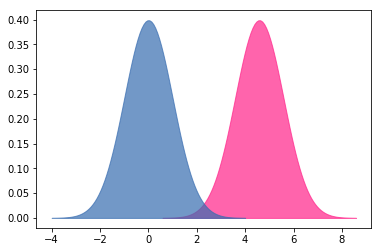

In [196]:
d = Cohen_d(disc_15to20, no_disc)
plot_pdfs(d)

Magenta = group1 = disc_15to20 ;   blue = group2 = no_disc

**Big difference** between average order quantity for substantially discounted products (magenta) and non-discounted products (blue).

This Cohen's d result (3.65511769) represents a difference of 3.66 pooled standard deviations between the two groups, and suggests a **large** effect size.


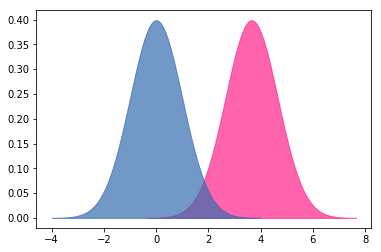

In [197]:
d = Cohen_d(disc_20andup, no_disc)
plot_pdfs(d)

Magenta = group1 = disc_20andup ;   blue = group2 = no_disc

And once again, an **even bigger difference** between average order quantity for substantially discounted products (magenta) and non-discounted products (blue).

## Findings and interpretation of test results for Question 3

Results regarding average order quantity relative to discount offered are, with a few exceptions, intuitive.  
-  Not surprising:  Larger discounts tend to correlate in a statistically significant way to greater order unit quantities.
-  Somewhat surprising:  Products in the 5-9.9% discount band (which is comprised almost entirely of 5% discounts) tend to have higher effect sizes (measured by Cohen's d) than those at 10-15%.  They even have a slightly higher effect size than discounts at 20% and above (though Cohen's d for this pairing is small).  
-  Future exploration could focus on why these patterns appear.  A few possibilities:
   -  Smaller discounts are likely to be applied to a broader range of products than deeper discounts, so there are just a lot more products that can be purchased at that level
   -  It could be that larger discounts are applied relatively more often to more expensive products than less expensive ones.  Rather than driving additional unit purchases, these larger discounts might be applied to more expensive products to induce a purchase that might not otherwise have happened, and/or to hasten a sale in the case of perishable products. 

These findings, combined with those on average order revenue by discount levels, provide some intriguing insights into how pricing occurs and sales are made.  Some focused exploration on discounts by product categories and specific products will likely lead to targeted strategies for improving sales in certain categories and/or geographies.


I've concluded the following after running Tukey's Test and Cohen's d for each pairwise comparison: 
-  Discounts at the 5-10% level appear to drive the highest revenues per order, relative to all other discount levels (or no discount at all)
    -  While higher discounts are likely to drive more purchases, the per-unit revenue will decrease with larger discounts.  
    -  Perhaps this relatively small discount level is enough to get customers to buy more while preserving higher revenue per unit 

# Fourth question

Does the **_level of discount_** affect average revenues per order?


## Null and alternative hypotheses for fourth question 

-  **Null hypothesis:**  No significant difference among the means of per-order revenues from the various discount values 

    -  Ho:  $\mu_1 = \mu_2 = \mu_3 ... = \mu_i$)


-  **Alternative hypothesis:** Differences among the means of per-order revenues resulting from various discount values are unlikely to be due to chance  

    -  Ha:  $\mu_1 \neq \mu_2 \neq \mu_3 \neq ... \neq \mu_i$


## EDA 

### Summary of revenues by level of discount

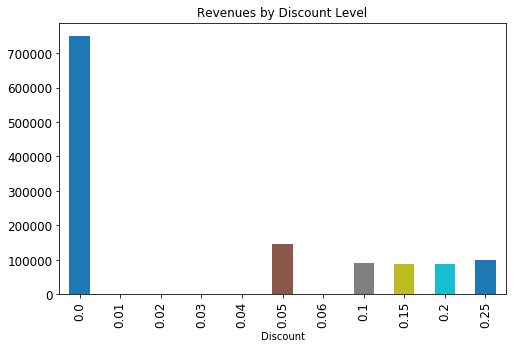

In [198]:
df.groupby('Discount')['Revenue'].sum().plot(kind='bar', 
            title ="Revenues by Discount Level", figsize=(8, 5), fontsize=12)
plt.show()


Almost 60% of product revenues are from non-discounted products--which means that over 40% of product revenues are the result of discounted products.  Of discounted products, those products discounted by 5% bring in the most revenue of all discounted products, with 25% representing the next highest revenue amount (~\$100000).  The remaining discount amounts with significant revenues are 10%, 15% and 20%.  All three are virtually equal, but 10% appears to represent slightly greater revenues than those from 15% or 20% discounts.

### Visualizations of discount levels vs. revenues from no discounts
As in the first case, we can create some initial visualizations to see if the magnitude of the discount results in differences in the sales revenues distributions.  

In [200]:
# function for plotting three different series 

def hist_plot3(var1, var2, var3, label=None, label1=None, label2=None, color='b', alpha=0.5, bins=100, xlim=[0, 3500]):
    var1 = var1
    var2 = var2
    var3 = var3
    alpha = alpha
    plt.hist(var1, label=label, color='r', alpha=0.5, bins=100)
    plt.hist(var2, label=label1, color='b', alpha=0.5, bins=100)
    plt.hist(var3, label=label2, color='g', alpha=0.5, bins=100)
    plt.title(f"Revenue amounts by occurrence (xlim = {xlim})")
    plt.xlabel("Revenue")
    plt.ylabel("Number")
    plt.legend(loc='best')
    plt.xlim(xlim)
    plt.show()


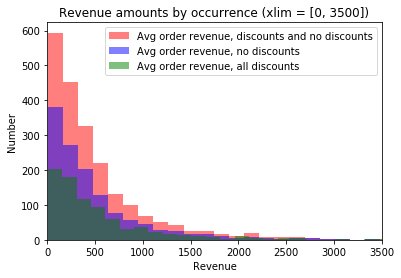

Total revenues (discount and no discount):  1265793
Total revenues, no discount:  750698
Total revenues from all discounted products:  515094


In [201]:
hist_plot3(total_revenue.Revenue, revenue_no_discount.Revenue, revenue_all_discounts.Revenue, label='Avg order revenue, discounts and no discounts', label1='Avg order revenue, no discounts', label2='Avg order revenue, all discounts')

print(f"Total revenues (discount and no discount):  {int(total_revenue.Revenue.sum())}")
print(f"Total revenues, no discount:  {int(revenue_no_discount.Revenue.sum())}")
print(f"Total revenues from all discounted products:  {int(revenue_all_discounts.Revenue.sum())}")


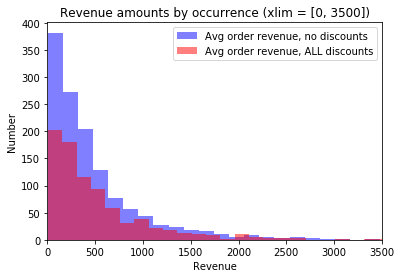

In [202]:
hist_plot2(revenue_no_discount.Revenue, revenue_all_discounts.Revenue, label='Avg order revenue, no discounts', label1='Avg order revenue, ALL discounts', alpha=0.5, bins=100)


##### Discounts = 1% to 4.99%:  Effect on total revenues

Because the revenues from this group are so small, I will be ignoring them for the purposes of this analysis.

##### Discounts = 5% to 9.99%:  Effect on total revenues

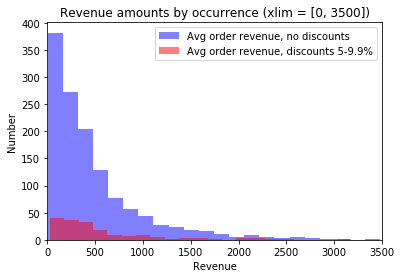

Revenues from discount level of 5-9.99%:  147681
Discount 5-9.99% as a percentage of total revenue:  11.667%
Discount 5-9.99% as a percentage of all discount revenue:  28.671%


In [203]:
hist_plot2(revenue_no_discount.Revenue, df_disc_05to10.Revenue, label='Avg order revenue, no discounts', label1='Avg order revenue, discounts 5-9.9%', alpha=0.5)

print(f"Revenues from discount level of 5-9.99%:  {int(df_disc_05to10.Revenue.sum())}")
print(f"Discount 5-9.99% as a percentage of total revenue:  {round((df_disc_05to10.Revenue.sum()/total_revenue.Revenue.sum())*100, 3)}%")
print(f"Discount 5-9.99% as a percentage of all discount revenue:  {round((df_disc_05to10.Revenue.sum()/revenue_all_discounts.Revenue.sum())*100, 3)}%")

##### Discounts = 10% to 14.99%:   Effect on total revenues

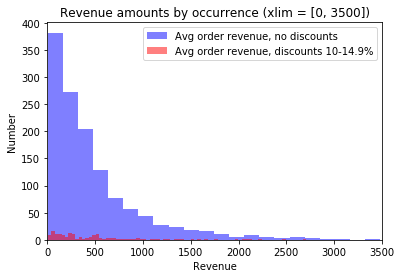

Revenues from discount level of 10-14.99%:  91499
Discount 10-14.99% as a percentage of total revenue:  7.229%
Discount 10-14.99% as a percentage of all discount revenue:  17.764%


In [204]:
hist_plot2(revenue_no_discount.Revenue, df_disc_10to15.Revenue, label='Avg order revenue, no discounts', label1='Avg order revenue, discounts 10-14.9%', alpha=.5)

print(f"Revenues from discount level of 10-14.99%:  {int(df_disc_10to15.Revenue.sum())}")
print(f"Discount 10-14.99% as a percentage of total revenue:  {round((df_disc_10to15.Revenue.sum()/total_revenue.Revenue.sum())*100, 3)}%")
print(f"Discount 10-14.99% as a percentage of all discount revenue:  {round((df_disc_10to15.Revenue.sum()/revenue_all_discounts.Revenue.sum())*100, 3)}%")

#####  Discounts = 15% to 19.99%:  Effect on total revenues

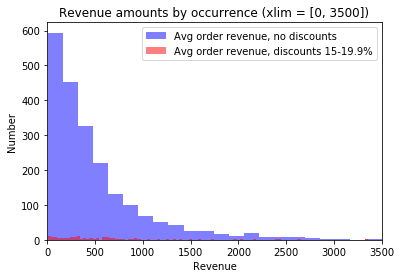

Revenues from discount level of 15-19.99%:  87506
Discount 15-19.99% as a percentage of total revenue:  6.913%
Discount 15-19.99% as a percentage of all discount revenue:  16.988%


In [205]:
hist_plot2(total_revenue.Revenue, df_disc_15to20.Revenue,  label='Avg order revenue, no discounts', label1='Avg order revenue, discounts 15-19.9%',alpha=0.5, bins=100)

print(f"Revenues from discount level of 15-19.99%:  {int(df_disc_15to20.Revenue.sum())}")
print(f"Discount 15-19.99% as a percentage of total revenue:  {round((df_disc_15to20.Revenue.sum()/total_revenue.Revenue.sum())*100, 3)}%")
print(f"Discount 15-19.99% as a percentage of all discount revenue:  {round((df_disc_15to20.Revenue.sum()/revenue_all_discounts.Revenue.sum())*100, 3)}%")

#####  Discounts = 20% or more:  Effect on total revenues

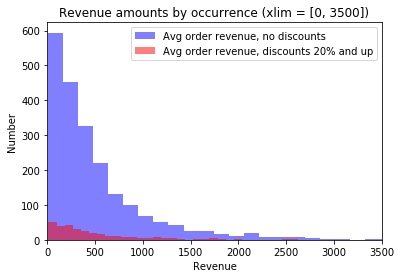

Revenues from discount level of 20% and up:  188119
Discount 20% and up as a percentage of total revenue:  14.862%
Discount 20% and up as a percentage of all discount revenue:  36.521%


In [206]:
hist_plot2(total_revenue.Revenue, df_disc_20andup.Revenue,  label='Avg order revenue, no discounts', label1='Avg order revenue, discounts 20% and up', alpha=0.5, bins=100)

print(f"Revenues from discount level of 20% and up:  {int(df_disc_20andup.Revenue.sum())}")
print(f"Discount 20% and up as a percentage of total revenue:  {round((df_disc_20andup.Revenue.sum()/total_revenue.Revenue.sum())*100, 3)}%")
print(f"Discount 20% and up as a percentage of all discount revenue:  {round((df_disc_20andup.Revenue.sum()/revenue_all_discounts.Revenue.sum())*100, 3)}%")

##### Totals and percentages of discount revenue to all revenues

In [207]:
df.groupby(['Discount']).sum().sort_values(['Discount'], ascending=False)

,Id,ProductId,OrderUnitPrice,OrderQty,CategoryId,Revenue,RevPercentTotal,RevFractionTotal
Discount,,,,,,,,
0.25,1648801,5820,4345.02,4349,643,98938.5675,7.816331,0.078163
0.20,1711705,6445,3787.81,4351,661,89181.1040,7.045473,0.070455
0.15,1672996,6351,3607.22,4456,595,87506.1740,6.913150,0.069132
0.10,1833523,7164,4354.68,4366,742,91499.1390,7.228602,0.072286
0.06,11077,60,34.00,2,4,63.9200,0.005050,0.000050
0.05,1972417,7311,5697.32,5182,783,147617.3745,11.662047,0.116620
0.04,11077,20,81.00,1,3,77.7600,0.006143,0.000061
0.03,33231,94,73.95,5,15,120.9105,0.009552,0.000096
0.02,22154,52,37.00,4,10,59.7800,0.004723,0.000047


The mean of the distribution is 570.01


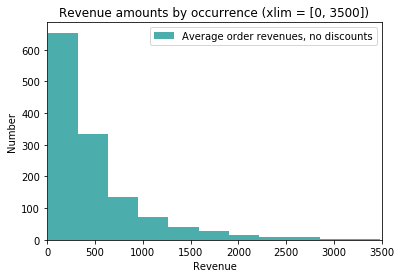

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [208]:
print(f"The mean of the distribution is {round(revenue_no_discount.Revenue.mean(), 2)}")
hist_plot1(revenue_no_discount.Revenue, label="Average order revenues, no discounts") # plotting with xlim in place


The mean of the distribution is 793.99


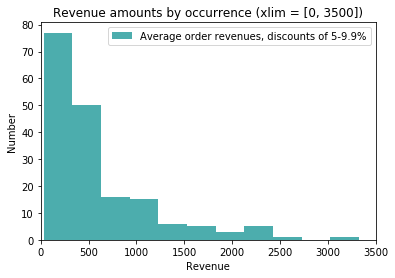

In [209]:
# hist_plot1(df_disc_05to10.Revenue, xlim=None)  # plotting without xlim to see outliers
print(f"The mean of the distribution is {round(df_disc_05to10.Revenue.mean(), 2)}")
hist_plot1(df_disc_05to10.Revenue, label="Average order revenues, discounts of 5-9.9%", print_stmt=False) # plotting with xlim in place


The mean of the distribution is 528.9


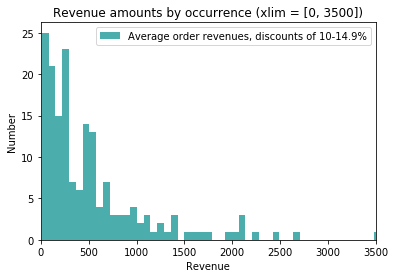

In [210]:
# hist_plot1(df_disc_10to15.Revenue, xlim=None)
print(f"The mean of the distribution is {round(df_disc_10to15.Revenue.mean(), 2)}")
hist_plot1(df_disc_10to15.Revenue, label="Average order revenues, discounts of 10-14.9%", print_stmt=False)



The mean of the distribution is 557.36


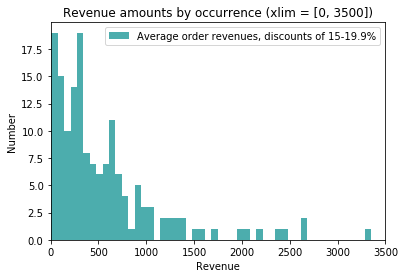

In [211]:
# hist_plot1(df_disc_15to20.Revenue, xlim=None)
print(f"The mean of the distribution is {round(df_disc_15to20.Revenue.mean(), 2)}")
hist_plot1(df_disc_15to20.Revenue, label="Average order revenues, discounts of 15-19.9%", print_stmt=False)


The mean of the distribution is 597.21


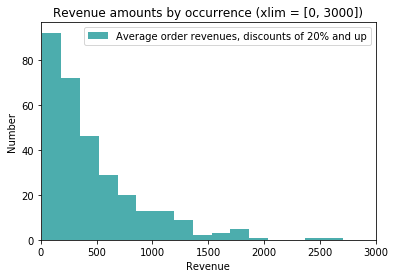

In [212]:
# hist_plot1(df_disc_20andup.Revenue, xlim=None)
print(f"The mean of the distribution is {round(df_disc_20andup.Revenue.mean(), 2)}")
hist_plot1(df_disc_20andup.Revenue, label="Average order revenues, discounts of 20% and up", xlim=[0, 3000], print_stmt=False)


## Testing for significance:  sampling, test setup and results 
A review of the histogram plots for revenues deriving from various discount levels shows that, much like the overall revenue frequency histograms, the histograms of these revenue-from-discount subsets reveal non-normally distributed data.  To run the statistical tests needed to test the hypotheses in the second question, I will perform multiple sampling of the datasets, then performing statistical tests on the distribution of the means.  Per the Central Limit Theorem, these distributions should be approximately normal, and so can be used for other tests (specifically Tukey's test).

### First test chosen:  ANOVA

This test will tell us that at least one of the datasets is significantly different than the others.  (It doesn't tell us which one, though.)

As with the t-test above, I will first perform resampling and create distributions of the means of these resampling events to form approximately normal distributions to perform the ANOVA test.

### Multiple sampling of datasets to obtain normal distribution of means


The mean of the distribution is 569.11
The std deviation of the distribution is 342.98


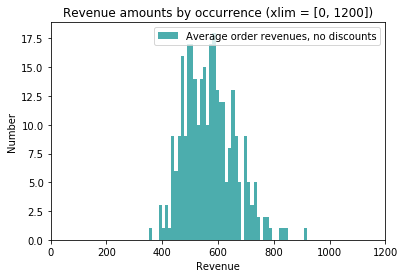

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [213]:
no_discounts = sampling_mean(revenue_no_discount.Revenue)
print(f"The mean of the distribution is {round(np.mean(no_discounts[0]), 2)}")
print(f"The std deviation of the distribution is {round(np.std(no_discounts[1]), 2)}")
hist_plot1(no_discounts[0], label="Average order revenues, no discounts", xlim=([0, 1200]))


The mean of the distribution is 619.13
The std deviation of the distribution is 373.21


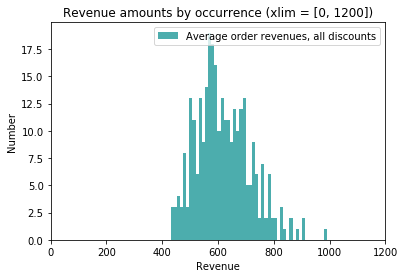

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [214]:
all_discounts = sampling_mean(revenue_all_discounts.Revenue)
print(f"The mean of the distribution is {round(np.mean(all_discounts[0]), 2)}")
print(f"The std deviation of the distribution is {round(np.std(all_discounts[1]), 2)}")
hist_plot1(all_discounts[0], label="Average order revenues, all discounts", xlim=([0, 1200]))


In [215]:
# testing that function results can be plugged into ttest_ind

scs.ttest_ind(no_discounts[0], all_discounts[0])

Ttest_indResult(statistic=-6.51080459366368, pvalue=1.5846831438367374e-10)

##### Sub-dataframes based on revenues from a given discount level

As a reminder, here are the dataframes I've built so far:
-  total_revenue -- Total revenues, with **and** without discounts
-  revenue_no_discount -- All revenues resulting from sales of **non**-discounted products
-  revenue_all_discounts -- All revenues resulting from sales of products at **all** discount levels
-  df_disc_01to05.Revenue -- Products discounted 1-4.9%
-  df_disc_05to10.Revenue -- Products discounted 5-9.9%
-  df_disc_10to15.Revenue -- Products discounted 10-14.9%
-  df_disc_15to20.Revenue -- Products discounted 15-19.9%
-  df_disc_20andup.Revenue -- Products discounted 20% or more

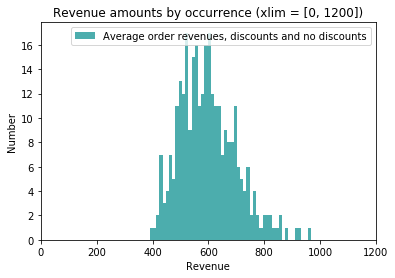

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [216]:
total_rev_means = sampling_mean(total_revenue.Revenue)
np.mean(total_rev_means[0]), np.std(total_rev_means[1])

hist_plot1(total_rev_means[0], label="Average order revenues, discounts and no discounts", xlim=([0, 1200]))


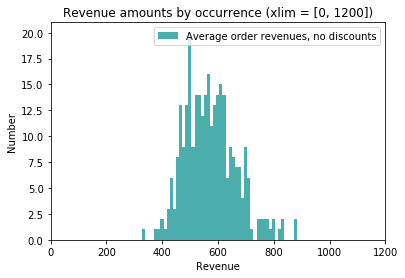

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [217]:
revs_no_disc_means = sampling_mean(revenue_no_discount.Revenue)
np.mean(revs_no_disc_means[0]), np.std(revs_no_disc_means[1])

hist_plot1(revs_no_disc_means[0], label="Average order revenues, no discounts", xlim=([0, 1200]))

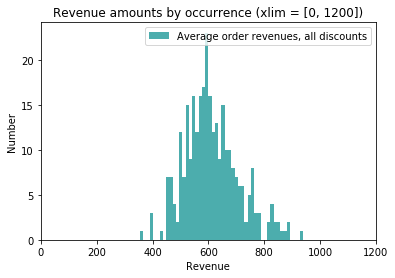

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [218]:
revs_all_disc_means = sampling_mean(revenue_all_discounts.Revenue)
np.mean(revs_all_disc_means[0]), np.std(revs_all_disc_means[1])

hist_plot1(revs_all_disc_means[0], label="Average order revenues, all discounts", xlim=([0, 1200]))

**Note**--I'm not including revenues from 1-4.9% discounts because there are only 7 data points--not enough revenue points in this sample to compute these statistics

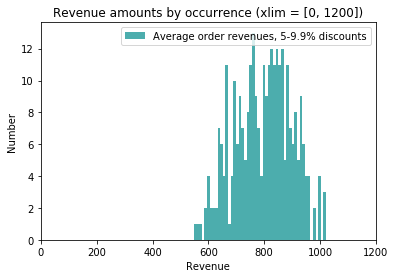

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [219]:
df_5to10_disc_means = sampling_mean(df_disc_05to10.Revenue)
np.mean(df_5to10_disc_means[0]), np.std(df_5to10_disc_means[1])

hist_plot1(df_5to10_disc_means[0], label="Average order revenues, 5-9.9% discounts", xlim=([0, 1200]))

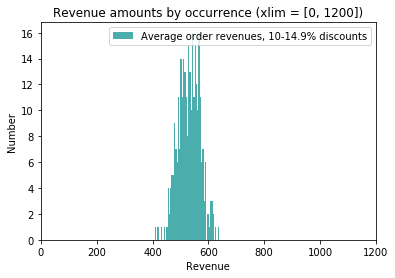

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [220]:
df_10to15_disc_means = sampling_mean(df_disc_10to15.Revenue)
np.mean(df_10to15_disc_means[0]), np.std(df_10to15_disc_means[1])

hist_plot1(df_10to15_disc_means[0], label="Average order revenues, 10-14.9% discounts", xlim=([0, 1200]))

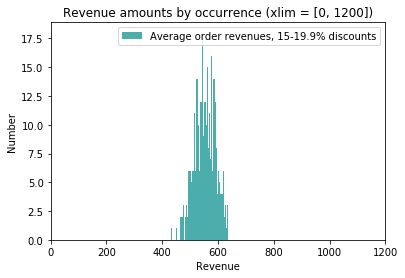

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [221]:
df_15to20_disc_means = sampling_mean(df_disc_15to20.Revenue)
np.mean(df_15to20_disc_means[0]), np.std(df_15to20_disc_means[1])

hist_plot1(df_15to20_disc_means[0], label="Average order revenues, 15-19.9% discounts", xlim=([0, 1200]))


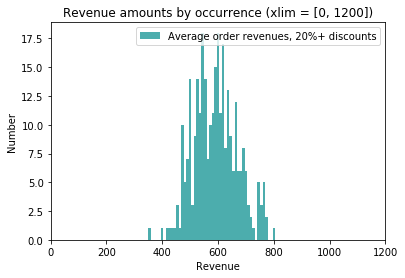

Total revenues (discount and no discount):  1265793
Total revenues from all discounted products:  515094
Percentage of total revenue from discounts:  40.693%


In [222]:
df_20andup_disc_means = sampling_mean(df_disc_20andup.Revenue)
np.mean(df_20andup_disc_means[0]), np.std(df_20andup_disc_means[1])

hist_plot1(df_20andup_disc_means[0], label="Average order revenues, 20%+ discounts", xlim=([0, 1200]))


### One-way ANOVA test using scipy.stats:
 
scipy.stats.f_oneway(*args)

A p-value of < $\alpha$ (0.05) signifies that there is a < 5% chance that we would see the differences we would observe among the sample means distributions.  A p-value of >= 0.05 signifies that there is a greater than 5% chance (p-value probability) that the differences observed among the distributions is due to chance.  

In [223]:
scs.f_oneway(revs_no_disc_means[0], df_5to10_disc_means[0], df_10to15_disc_means[0], df_15to20_disc_means[0], df_20andup_disc_means[0])


F_onewayResult(statistic=622.92415360654, pvalue=1.8044953e-316)

The extremely low p-value of the ANOVA test tell us that we should reject the null hypothesis (that there is no statistically significant difference between the distributions of means) and strongly suggests that at least one of the distributions of means differs signficantly from at least one other.  

Because ANOVA doesn't tell us which variables differ from others, I'll run Tukey's test to find out.

### Second test chosen:  Tukey's Range Test

This test can tell us which variables are significantly different from one another.  

Per the codeacademy Hypothesis Testing presentation by Hillary Green-Lerman, three things are required for pairwise_tukeyhsd:
1. A vector of all data (concatenated using np.concatenate)
2. A vector of labels for the data
3. A level of significance (usually 0.05)


In [224]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [225]:
no_disc = np.array(revs_no_disc_means[0])           # the number of means in these lists 
disc_05to10 = np.array(df_5to10_disc_means[0])    # equals the sampling events input to 
disc_10to15 = np.array(df_10to15_disc_means[0])  # the sampling function that was run to 
disc_15to20 = np.array(df_15to20_disc_means[0])   # obtain this data
disc_20andup = np.array(df_20andup_disc_means[0])

v = np.concatenate([no_disc, disc_05to10, disc_10to15, disc_15to20, disc_20andup])
labels = ['no_disc'] * len(no_disc) + ['disc_05to10'] * len(disc_05to10) + ['disc_10to15'] * len(disc_10to15) + ['disc_15to20']*len(disc_15to20) + ['disc_20andup']*len(disc_20andup)
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

type(tukey_results)


      Multiple Comparison of Means - Tukey HSD,FWER=0.05      
   group1       group2     meandiff   lower     upper   reject
--------------------------------------------------------------
disc_05to10  disc_10to15  -266.8219 -283.4932 -250.1506  True 
disc_05to10  disc_15to20  -243.9819 -260.6531 -227.3106  True 
disc_05to10  disc_20andup -206.7886 -223.4598 -190.1173  True 
disc_05to10    no_disc    -225.1475 -241.8187 -208.4762  True 
disc_10to15  disc_15to20    22.84     6.1688   39.5113   True 
disc_10to15  disc_20andup  60.0333   43.3621   76.7046   True 
disc_10to15    no_disc     41.6744   25.0032   58.3457   True 
disc_15to20  disc_20andup  37.1933   20.5221   53.8646   True 
disc_15to20    no_disc     18.8344    2.1631   35.5057   True 
disc_20andup   no_disc     -18.3589  -35.0302  -1.6876   True 
--------------------------------------------------------------


statsmodels.sandbox.stats.multicomp.TukeyHSDResults

On most occasions of running the sampling function to get these results, the result I get is that we can **reject the null hypothesis for all pairs** _except_ the disc_15to20 / no_disc pair.  What this means is that each of these distributions of means (except for the disc_15ot20 / no_disc pair) are statistically significantly different from each other at the 0.05 level.  

I have noticed that if I reduce the number of sampling events in the function, I will occasionally see slightly different results.  Sometimes, I will get a "reject the null hypothesis" result for every single pair.  Other times, I will get "False" for a few of the pairs (usually for the 15-20% / no discount pair, but have also seen it for one or two others).  Increasing the number of sampling events from 200 to 300 in the function seems to eliminate that variability.  

##### A few comments on Tukey results

Two really interesting things that emerge from running the Tukey test are:
1.  The differences between means of the disc_15to20 distribution and the means of the no_disc (no discounts group) are NOT statistically significant.  15-19% seems to be a fairly large discount, so I am a bit surprised to see that this pair was not significantly different.


2.  ALL other pair comparisons result in statistically significant differences.
    -  While perhaps this is not surprising, it does make me wonder if there is a linear relationship between discount levels, or if it's just the fact that there is a discount.  
    -  It's important to remind ourselves that sales from discounts of 1-4.9% were so low (only \\$288 dollars of over \\$1.2 million total revenues) that they were not included.  There were only 7 data points in that category.  It suggests that either such small discounts don't work, or that the company (or its salespeople) just don't offer such discounts.

### Effect size:  Cohen's d pairwise comparisons and visualization

To find out the effect sizes of the various discount levels, we can run Cohen's d to see which ones are most important.  Except for one pairing, all were significant, so will need to do Cohen's d on each of the other pairs.

This Cohen's d result (3.49094358) represents a difference of 3.49 pooled standard deviations between the two groups, and suggests a **large** effect size.


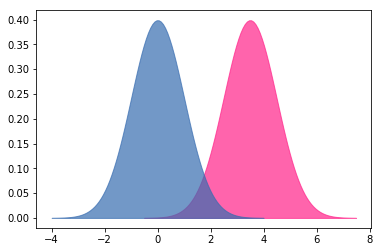

In [226]:
d = Cohen_d(disc_05to10, disc_10to15)
plot_pdfs(d)

Magenta = group1 = disc_05to10 ;   blue = group2 = disc_10to15

The means of revenues from discounts of 5-9.9% are **significantly higher** than the means of revenues from discounts of 10-14.9%.

A possible mechanism with two opposing forces might explain why we see this outcome:  
1.  A greater discount may drive customers to purchase more... BUT...
2.  The larger discount may ultimately put more downward pressure on the total revenue per sale...the customer may or may not be buying more stuff, but what they are buying, they are getting for a lower price --> lower revenue per unit

This Cohen's d result (3.20577353) represents a difference of 3.21 pooled standard deviations between the two groups, and suggests a **large** effect size.


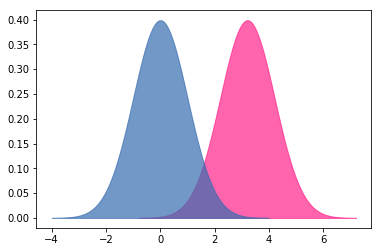

In [227]:
d = Cohen_d(disc_05to10, disc_15to20)
plot_pdfs(d)

Magenta = group1 = disc_05to10 ;   blue = group2 = disc_15to20

The means of revenues from discounts of 5-9.9% are **significantly higher** than the means of revenues from discounts of 15-19.9%.

This Cohen's d result (2.28893721) represents a difference of 2.29 pooled standard deviations between the two groups, and suggests a **large** effect size.


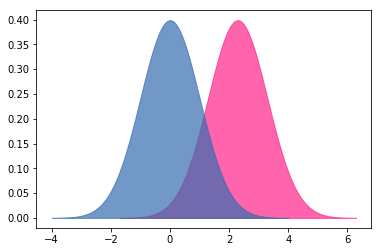

In [228]:
d = Cohen_d(disc_05to10, disc_20andup)
plot_pdfs(d)

Magenta = group1 = disc_05to10 ; blue = group2 = disc_20andup

The means of revenues from discounts of 5-9.9% are **significantly higher** than the means of revenues from discounts of 20% and up.


This Cohen's d result (2.32595345) represents a difference of 2.33 pooled standard deviations between the two groups, and suggests a **large** effect size.


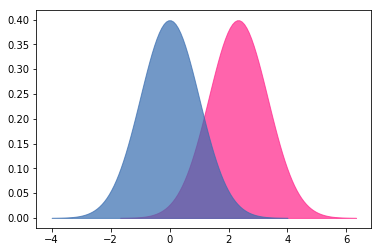

In [229]:
d = Cohen_d(disc_05to10, no_disc)
plot_pdfs(d)

Magenta = group1 = disc_05to10 ;   blue = group2 = no_disc

The means of revenues from discounts of 5-9.9% are **significantly higher** than the means of revenues from non-discounted products.

This Cohen's d result (-0.5947696) represents a difference of -0.59 pooled standard deviations between the two groups, and suggests a **medium** effect size.


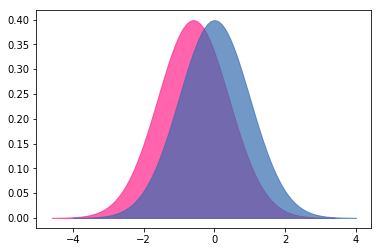

In [230]:
d = Cohen_d(disc_10to15, disc_15to20)
plot_pdfs(d)

Magenta = group1 = disc_10to15 ;   blue = group2 = disc_15to20

The means of revenues from discounts of 10-14.9% are **somewhat lower** than the means of revenues from discounts of 15-20%.  Another slightly counter-intuitive result.

This Cohen's d result (-0.96825675) represents a difference of -0.97 pooled standard deviations between the two groups, and suggests a **large** effect size.


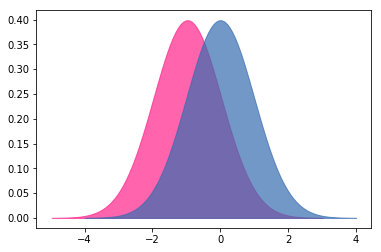

In [231]:
d = Cohen_d(disc_10to15, disc_20andup)
plot_pdfs(d)

Magenta = group1 = disc_10to15 ;   blue = group2 = disc_20andup

The means of revenues from discounts of 10-14.9% are **lower** than the means of revenues from discounts of 20% and up.

This Cohen's d result (-0.58631089) represents a difference of -0.59 pooled standard deviations between the two groups, and suggests a **medium** effect size.


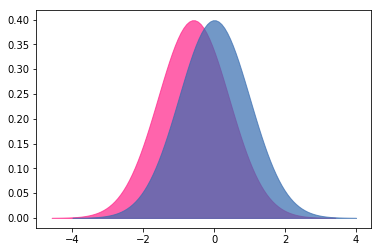

In [232]:
d = Cohen_d(disc_10to15, no_disc)
plot_pdfs(d)

Magenta = group1 = disc_10to15 ;   blue = group2 = no_disc

The means of revenues from discounts of 10-14.9% are **slightly lower** than the means of revenues from non-discounted products.  This is a somewhat counterintuitive result that warrants further investigation.

This Cohen's d result (-0.60379089) represents a difference of -0.6 pooled standard deviations between the two groups, and suggests a **medium** effect size.


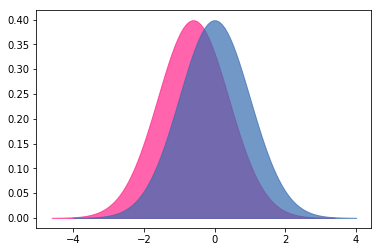

In [233]:
d = Cohen_d(disc_15to20, disc_20andup)  
plot_pdfs(d)

Magenta = group1 = disc_15to20 ;   blue = group2 = disc_20andup

The means of revenues from discounts of 15-19.9% are **slightly lower** than the means of revenues from discounts of 20% and up.

This Cohen's d result (-0.26629028) represents a difference of -0.27 pooled standard deviations between the two groups, and suggests a **small** effect size.


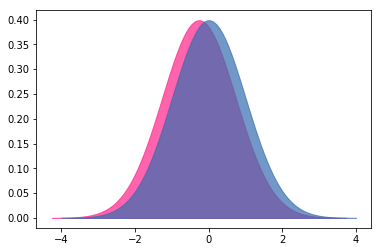

In [234]:
d = Cohen_d(disc_15to20, no_disc)
plot_pdfs(d)

# note that this pairing was not found to be statistically significant in Tukey's test.

Magenta = group1 = disc_15to20 ;   blue = group2 = no_disc

The means of revenues from discounts of 15-19.9% are very similar to the means of revenues from non-discounted products.

This Cohen's d result (0.21382176) represents a difference of 0.21 pooled standard deviations between the two groups, and suggests a **small** effect size.


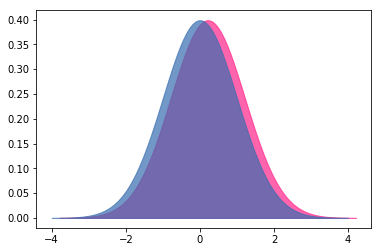

In [235]:
d = Cohen_d(disc_20andup, no_disc)
plot_pdfs(d)

Magenta = group1 = disc_20andup ;   blue = group2 = no_disc

The means of revenues from discounts of 20% and up are **slightly higher** than the means of revenues from non-discounted products.

## Findings and interpretation of test results for Question 4

I've concluded the following after running Tukey's Test and Cohen's d for each pairwise comparison: 
-  Discounts at the 5-10% level appear to drive the highest revenues per order, relative to all other discount levels (or no discount at all)
    -  While higher discounts are likely to drive more purchases, the per-unit revenue will decrease with larger discounts.  
    -  Perhaps this relatively small discount level is enough to get customers to buy more while preserving higher revenue per unit 
    
    
-  Generally, as the discount increases, these differences shrink (though they are still quite significant) 
    -  One notable exception is that in the "5-10% discount vs. no discount" pair, the difference between the means is not as great as it is for the "5-10% discount vs. 10-15% discount" pair
    -  It is possible that, in the cases where the difference between a given discount level and no discount is less than one would expect, there are some high-volume and/or high-priced products that are never discounted that drive the no-discount revenue means upward.
    
    
-  More investigation is needed to derive insights and make recommendations; questions to pursue include:
    -  Does the pattern of revenue by discounts hold across all categories, or is there a subset of products that create the outcomes we see?
    -  Similarly, is there a relationship between geography/sales region and the discounts that drive more revenues?
    -  Do we see certain discount levels drive more revenues at certain times of the year?
    -  Is there a linear or non-linear relationship between discount level and revenues?
    -  Does removal of outliers dramatically affect the relationships observed?

# Fifth question

Does the distribution of revenues per order vary in a statistically significant way across product categories?

This analysis can show us whether the distribution of revenues per order varies in a significant way across product categories.  This can help us understand if orders in certain product categories generate higher revenues on average. 

## Null and alternative hypotheses for third question 

-  **Null hypothesis:**  No significant difference among the means of order revenues distributions by product category

    -  Ho:  $\mu_1 = \mu_2 = \mu_3 ... = \mu_i$


-  **Alternative hypothesis:** Differences among the means of order revenues distributions by product category are unlikely to be due to chance  

    -  Ha:  $\mu_1 \neq \mu_2 \neq \mu_3 \neq ... \neq \mu_i$


In [236]:
# df.groupby(['CategoryId', 'CategoryName', 'CatDescription']).sum().sort_values(['CategoryId'])

df.groupby(['CategoryId', 'CategoryName', 'Discount']).count().head(10)

Id  CustomerId  OrderDate  ProductId  \
CategoryId CategoryName Discount                                          
1          Beverages    0.00      246         246        246        246   
                        0.05       26          26         26         26   
                        0.10       25          25         25         25   
                        0.15       36          36         36         36   
                        0.20       39          39         39         39   
                        0.25       32          32         32         32   
2          Condiments   0.00      131         131        131        131   
                        0.02        1           1          1          1   
                        0.05       19          19         19         19   
                        0.10       23          23         23         23   

                                  OrderUnitPrice  OrderQty  ProductName  \
CategoryId CategoryName Discount                                          
1          Beverages    0.00                 246       246          246   
                        0.05                  26        26           26   
                        0.10                  25        25           25   
                        0.15                  36        36           36   
                        0.20                  39        39           39   
                        0.25                  32        32           32   
2          Condiments   0.00                 131       131          131   
                        0.02                   1         1            1   
                        0.05                  19        19           19   
                        0.10                  23        23           23   

                                  CatDescription  Revenue  RevPercentTotal  \
CategoryId CategoryName Discount                                             
1          Beverages    0.00                 246      246              246   
                        0.05                  26       26               26   
                        0.10                  25       25               25   
                        0.15                  36       36               36   
                        0.20                  39       39               39   
                        0.25                  32       32               32   
2          Condiments   0.00                 131      131              131   
                        0.02                   1        1                1   
                        0.05                  19       19               19   
                        0.10                  23       23               23   

                                  RevFractionTotal  
CategoryId CategoryName Discount                    
1          Beverages    0.00                   246  
                        0.05                    26  
                        0.10                    25  
                        0.15                    36  
                        0.20                    39  
                        0.25                    32  
2          Condiments   0.00                   131  
                        0.02                     1  
                        0.05                    19  
                        0.10                    23

In [237]:
df.groupby(['CategoryId', 'CategoryName', 'Discount']).sum().head(20)

Id  ProductId  OrderUnitPrice  \
CategoryId CategoryName Discount                                       
1          Beverages    0.00      2623997      10381         7161.95   
                        0.05       277313       1038         1507.75   
                        0.10       264816       1219          812.20   
                        0.15       384608       1348          609.65   
                        0.20       418197       1353         1005.40   
                        0.25       343213       1017          714.70   
2          Condiments   0.00      1399149       5724         2834.55   
                        0.02        11077          6           25.00   
                        0.05       202371        953          337.90   
                        0.10       243158        995          449.30   
                        0.15       180730        890          373.65   
                        0.20       148734        563          340.50   
                        0.25       118286        426          244.40   
3          Confections  0.00      2131272       7572         4636.56   
                        0.03        11077         16           17.45   
                        0.04        11077         20           81.00   
                        0.05       309325        843          705.63   
                        0.10       318611       1062          584.23   
                        0.15       308602        951          617.37   
                        0.20       180335        660          314.23   

                                  OrderQty      Revenue  RevPercentTotal  \
CategoryId CategoryName Discount                                           
1          Beverages    0.00          5116  153060.2500        12.092044   
                        0.05           898   43567.3800         3.441904   
                        0.10           728   13027.6350         1.029207   
                        0.15           885   12889.9950         1.018334   
                        0.20          1140   29569.3200         2.336031   
                        0.25           765   15753.6000         1.244564   
2          Condiments   0.00          2793   60577.8000         4.785759   
                        0.02             1      24.5000         0.001936   
                        0.05           719   11891.5300         0.939453   
                        0.10           536    8934.7050         0.705858   
                        0.15           519   10639.0250         0.840503   
                        0.20           312    6105.2000         0.482322   
                        0.25           418    7874.3250         0.622086   
3          Confections  0.00          4618  107128.4700         8.463348   
                        0.03             2      33.8530         0.002674   
                        0.04             1      77.7600         0.006143   
                        0.05           795   18598.5775         1.469322   
                        0.10           545   10200.7440         0.805878   
                        0.15           818   15433.5690         1.219281   
                        0.20           338    4716.2640         0.372594   

                                  RevFractionTotal  
CategoryId CategoryName Discount                    
1          Beverages    0.00              0.120920  
                        0.05              0.034419  
                        0.10              0.010292  
                        0.15              0.010183  
                        0.20              0.023360  
                        0.25              0.012446  
2          Condiments   0.00              0.047858  
                        0.02              0.000019  
                        0.05              0.009395  
                        0.10              0.007059  
                        0.15              0.008405  
                        0.20              0.004823  
                        0.25           

## EDA

### Bar graphs

#### Product discount by product category

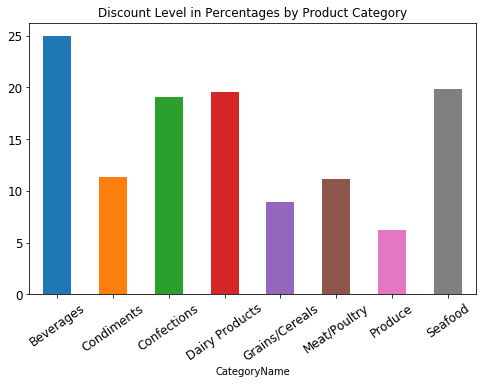

In [238]:
df.groupby('CategoryName')['Discount'].sum().plot(kind='bar', 
            title ="Discount Level in Percentages by Product Category", figsize=(8, 5), fontsize=12)
# x = df.groupby('CategoryName')['Discount'].sum()
plt.xticks(rotation=35)
plt.show()


The category with the greatest discounts is Beverages, with Seafood, Dairy Products, and Confections nearly tied in 2nd place with approximately 20% discounts in each category.

Let's also look at revenues by product category and see how that compares to percentage discount:

#### Total revenues by product category

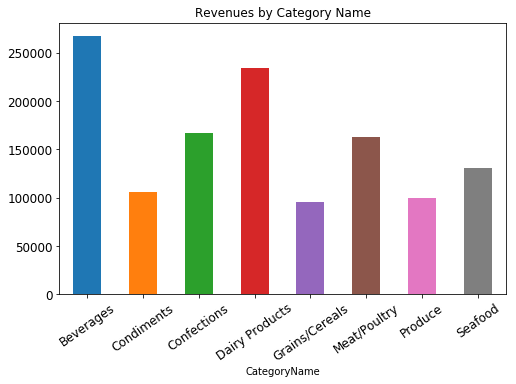

In [239]:
df.groupby('CategoryName')['Revenue'].sum().plot(kind='bar', 
            title ="Revenues by Category Name", figsize=(8, 5), fontsize=12)
plt.xticks(rotation=35)
plt.show()


#### Number of orders by product category

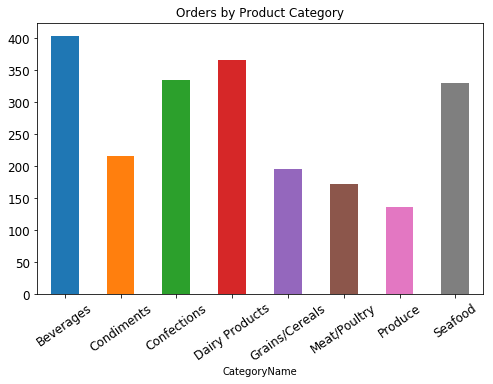

In [240]:
df.groupby('CategoryName')['Discount'].count().plot(kind='bar', 
            title ="Orders by Product Category", figsize=(8, 5), fontsize=12)
plt.xticks(rotation=35)
plt.show()


### Comments on initial EDA

Interestingly, Beverages has the highest revenues at around \\$260,000 of any category, followed closely by Dairy Products at around \\$230,000, then Confections at around \\$170,000, and Meat/Poultry at around \\$160,000.  Although Seafood tends to have fairly significant discounts at around 20%, it is 5th of 8 in terms of revenu, at around \\$140,000. 

Some observations and comments:
  -  For a category such as seafood, which is likely to include both highly perishable items and shelf-stable items (e.g., canned tuna, salmon, clams), it may not be surprising to see that discounts make up a higher proportion of revenues than is the case for less perishable items.  
  -  On the other hand, Produce has fairly low discounts and relatively low revenues.  I can think of a couple of possible questions that might warrant further exploration:
    -  Although perishable, produce quantities and discounts might have been optimized for its highly perishable nature; in other words, maybe Northwind only has access to a certain amount of produce from suppliers, and this amount tends to sell out (rather than having to be discarded).  
    -  While there may be some truth to this potential explanation, as a category, Produce experiences relatively high rates of loss due to spoilage compared to other categories, so there might be some  opportunities to get more revenue by offering greater discounts on selected items (thereby selling produce that might otherwise have gone to waste).  
  -  Condiments and Cereals/Grains are almost carbon copies of each other, in terms of both discount level and revenues.  It is likely that the relatively low cost and shelf-stable nature of these products leads to relatively modest discounts (since spoilage rates are lower, so not as much urgency to induce purchases before items spoil) and relatively modest revenues, due to their general affordability.  

### Setting  up product category dataframes

In [241]:
df_bev = df.loc[df["CategoryName"] == "Beverages"]
df_bev.head(3)


,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.2,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
1,10294,RATTC,2012-08-30,1,14.4,18,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",259.2,0.020477,0.000205
2,10317,LONEP,2012-09-30,1,14.4,20,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",288.0,0.022753,0.000228


In [242]:
df_cond = df.loc[df["CategoryName"] == "Condiments"]
df_cond.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
82,10289,BSBEV,2012-08-26,3,8.0,30,0.0,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",240.0,0.018960,0.000190
83,10405,LINOD,2013-01-06,3,8.0,50,0.0,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",400.0,0.031601,0.000316
84,10485,LINOD,2013-03-25,3,8.0,20,0.1,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",144.0,0.011376,0.000114


In [243]:
df_confect = df.loc[df["CategoryName"] == "Confections"]
df_confect.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
336,10255,RICSU,2012-07-12,16,13.9,35,0.00,Pavlova,3,Confections,"Desserts, candies, and sweet breads",486.5,0.038434,0.000384
337,10263,ERNSH,2012-07-23,16,13.9,60,0.25,Pavlova,3,Confections,"Desserts, candies, and sweet breads",625.5,0.049416,0.000494
338,10287,RICAR,2012-08-22,16,13.9,40,0.15,Pavlova,3,Confections,"Desserts, candies, and sweet breads",472.6,0.037336,0.000373


In [244]:
df_dairy = df.loc[df["CategoryName"] == "Dairy Products"]
df_dairy.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
216,10248,VINET,2012-07-04,11,14.0,12,0.0,Queso Cabrales,4,Dairy Products,Cheeses,168.0,0.013272,0.000133
217,10296,LILAS,2012-09-03,11,16.8,12,0.0,Queso Cabrales,4,Dairy Products,Cheeses,201.6,0.015927,0.000159
218,10327,FOLKO,2012-10-11,11,16.8,50,0.2,Queso Cabrales,4,Dairy Products,Cheeses,672.0,0.053089,0.000531


In [245]:
df_grains = df.loc[df["CategoryName"] == "Grains/Cereals"]
df_grains.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
535,10251,VICTE,2012-07-08,22,16.8,6,0.05,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",95.76,0.007565,0.000076
536,10435,CONSH,2013-02-04,22,16.8,12,0.00,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",201.60,0.015927,0.000159
537,10553,WARTH,2013-05-30,22,21.0,24,0.00,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",504.00,0.039817,0.000398


In [246]:
df_meat = df.loc[df["CategoryName"] == "Meat/Poultry"]
df_meat.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
178,10420,WELLI,2013-01-21,9,77.6,20,0.10,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,1396.8,0.110350,0.001103
179,10515,QUICK,2013-04-23,9,97.0,16,0.15,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,1319.2,0.104219,0.001042
180,10687,HUNGO,2013-09-30,9,97.0,50,0.25,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,3637.5,0.287369,0.002874


In [247]:
df_produce = df.loc[df["CategoryName"] == "Produce"]
df_produce.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
136,10262,RATTC,2012-07-22,7,24.0,15,0.00,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,360.0,0.028441,0.000284
137,10385,SPLIR,2012-12-17,7,24.0,10,0.20,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,192.0,0.015168,0.000152
138,10459,VICTE,2013-02-27,7,24.0,16,0.05,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,364.8,0.028820,0.000288


In [248]:
df_seafood = df.loc[df["CategoryName"] == "Seafood"]
df_seafood.head(3)
# df_seafood.info()

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
183,10273,QUICK,2012-08-05,10,24.8,24,0.05,Ikura,8,Seafood,Seaweed and fish,565.44,0.044671,0.000447
184,10276,TORTU,2012-08-08,10,24.8,15,0.00,Ikura,8,Seafood,Seaweed and fish,372.00,0.029389,0.000294
185,10357,LILAS,2012-11-19,10,24.8,30,0.20,Ikura,8,Seafood,Seaweed and fish,595.20,0.047022,0.000470


### Function to plot multiple histograms on one figure

In [249]:
def hist_plot8(series1, series2, series3, series4, series5, series6, series7, series8, label=None, label1=None, label2=None, label3=None, label4=None, label5=None, label6=None, label7=None, color1='b', color2='r', alpha=0.4, bins=100, xlim=[0, 3500], ylim=None,  fontsize=12):
    plt.hist(series1, label=label, color=color1, alpha=alpha, bins=bins)
    plt.hist(series2, label=label1, color=color2, alpha=alpha, bins=bins)
    plt.hist(series3, label=label2, alpha=alpha, bins=bins)
    plt.hist(series4, label=label3, alpha=alpha, bins=bins)
    plt.hist(series5, label=label4, alpha=alpha, bins=bins)
    plt.hist(series6, label=label5, alpha=alpha, bins=bins)
    plt.hist(series7, label=label6, alpha=alpha, bins=bins)
    plt.hist(series8, label=label7, alpha=alpha, bins=bins)
    plt.title(f"Revenue amounts by occurrence (xlim = {xlim})", fontsize=fontsize)
    plt.xlabel("Revenue", fontsize=fontsize)
    plt.ylabel("Number", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.legend(loc='best', fontsize=10)
    plt.xlim(xlim)  
    plt.ylim(ylim)
    plt.show()
    

### Histograms of product categories


Category:  Beverages


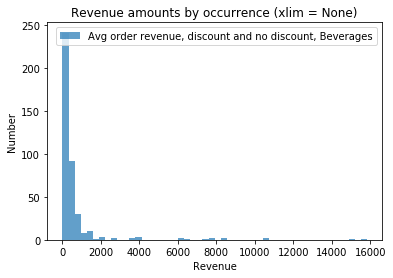

Note large outliers: highest order revenue is $15,810 for Cote de Blaye!
The mean of the distribution is 663.04



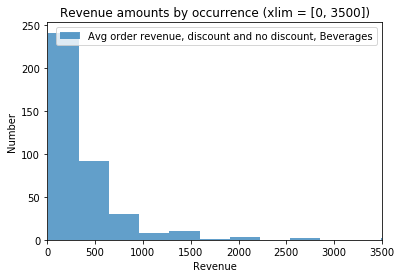

The mean of the distribution is 663.04



In [250]:
print()
print("Category:  Beverages")
hist_plot1(df_bev.Revenue, label="Avg order revenue, discount and no discount, Beverages", color='tab:blue', xlim=None, print_stmt=False)
print("Note large outliers: highest order revenue is $15,810 for Cote de Blaye!")
print(f"The mean of the distribution is {round(df_bev.Revenue.mean(), 2)}")
print()
hist_plot1(df_bev.Revenue, label="Avg order revenue, discount and no discount, Beverages", color='tab:blue', print_stmt=False)
print(f"The mean of the distribution is {round(df_bev.Revenue.mean(), 2)}")
print()

# note the large outliers



Category:  Condiments


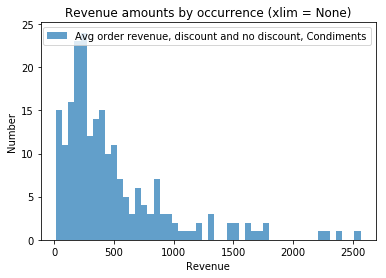

The mean of the distribution is 490.96




In [251]:
print()
print()
print("Category:  Condiments")
# hist_plot1(df_cond.Revenue, color='tab:blue')
# print(f"The mean of the distribution is {round(df_cond.Revenue.mean(), 2)}")
hist_plot1(df_cond.Revenue, label="Avg order revenue, discount and no discount, Condiments", color='tab:blue', xlim=None, print_stmt=False)
print(f"The mean of the distribution is {round(df_cond.Revenue.mean(), 2)}")
print()
print()




Category:  Confections


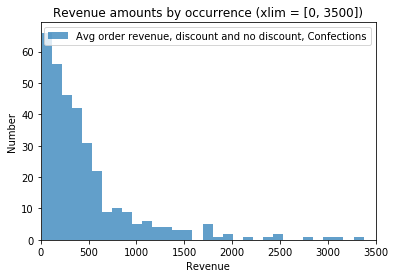

The mean of the distribution is 501.07




In [252]:
print()
print()
print("Category:  Confections")
hist_plot1(df_confect.Revenue, label="Avg order revenue, discount and no discount, Confections", color='tab:blue', print_stmt=False)
print(f"The mean of the distribution is {round(df_confect.Revenue.mean(), 2)}")
# hist_plot1(df_confect.Revenue, color='tab:blue', xlim=None)
# print(f"The mean of the distribution is {round(df_confect.Revenue.mean(), 2)}")
print()
print()




Category:  Dairy Products


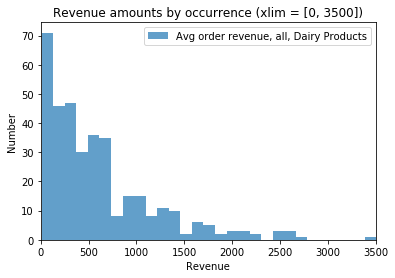

The mean of the distribution is 640.73




In [253]:
print()
print()
print("Category:  Dairy Products")
hist_plot1(df_dairy.Revenue, label="Avg order revenue, all, Dairy Products", color='tab:blue', print_stmt=False)
print(f"The mean of the distribution is {round(df_dairy.Revenue.mean(), 2)}")
# hist_plot1(df_dairy.Revenue, color='tab:blue', xlim=None)
# print(f"The mean of the distribution is {round(df_dairy.Revenue.mean(), 2)}")
print()
print()




Category:  Meat/Poultry


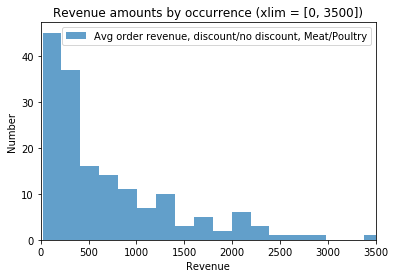

The mean of the distribution is 942.33




In [254]:
print()
print()
print("Category:  Meat/Poultry")
hist_plot1(df_meat.Revenue, label="Avg order revenue, discount/no discount, Meat/Poultry",color='tab:blue', print_stmt=False)
print(f"The mean of the distribution is {round(df_meat.Revenue.mean(), 2)}")
# hist_plot1(df_meat.Revenue, color='tab:blue', xlim=None)
# print(f"The mean of the distribution is {round(df_meat.Revenue.mean(), 2)}")
print()
print()




Category:  Grains/Cereals


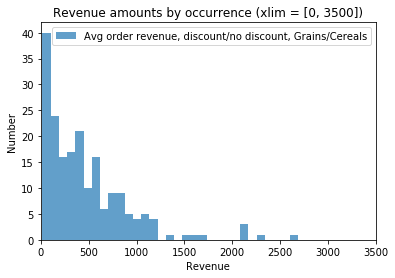

The mean of the distribution is 488.49




In [255]:
print()
print()
print("Category:  Grains/Cereals")
hist_plot1(df_grains.Revenue, label="Avg order revenue, discount/no discount, Grains/Cereals", color='tab:blue', print_stmt=False)
print(f"The mean of the distribution is {round(df_grains.Revenue.mean(), 2)}")
# hist_plot1(df_grains.Revenue, color='tab:blue', xlim=None)
# print(f"The mean of the distribution is {round(df_grains.Revenue.mean(), 2)}")
print()
print()




Category:  Produce


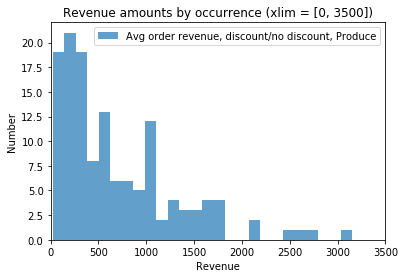

The mean of the distribution is 735.18




In [256]:
print()
print()
print("Category:  Produce")
hist_plot1(df_produce.Revenue, label="Avg order revenue, discount/no discount, Produce", color='tab:blue', print_stmt=False)
print(f"The mean of the distribution is {round(df_produce.Revenue.mean(), 2)}")
# hist_plot1(df_produce.Revenue, color='tab:blue', xlim=None)
# print(f"The mean of the distribution is {round(df_produce.Revenue.mean(), 2)}")
print()
print()




Category:  Seafood


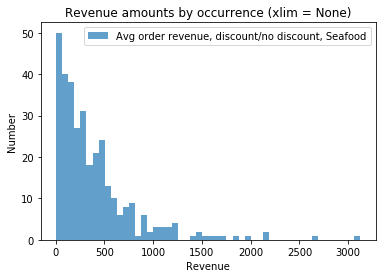

The mean of the distribution is 397.76




In [257]:
print()
print()
print("Category:  Seafood")
# hist_plot1(df_seafood.Revenue, color='tab:blue')
# print(f"The mean of the distribution is {round(df_seafood.Revenue.mean(), 2)}")
hist_plot1(df_seafood.Revenue, label="Avg order revenue, discount/no discount, Seafood", color='tab:blue', xlim=None, print_stmt=False)
print(f"The mean of the distribution is {round(df_seafood.Revenue.mean(), 2)}")
print()
print()


## Testing for significance:  sampling, test setup, and results

### Pulling samples for each product category and taking means

As with question 2, to ensure reasonably normal distributions for hypothesis testing, I will perform resampling for each product category to get a distribution of means. 

The mean of the means of beverage order revenues resampling is 650.8
The std deviation of the means of beverage order revenues resampling is 485.35


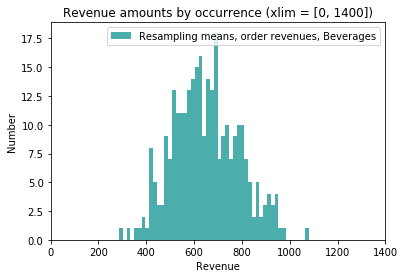

In [258]:
bev_means = sampling_mean(df_bev.Revenue)
mean_bev_means = np.mean(bev_means[0])
std_bev_means = np.std(bev_means[1])
print(f"The mean of the means of beverage order revenues resampling is {round(mean_bev_means,2)}")
print(f"The std deviation of the means of beverage order revenues resampling is {round(std_bev_means,2)}")
hist_plot1(bev_means[0], label="Resampling means, order revenues, Beverages", xlim=([0, 1400]), print_stmt=False)
series1 = bev_means[0]

The mean of the means of Condiments order revenues resampling is 493.04
The std deviation of the means of Condiments order revenues resampling is 42.01


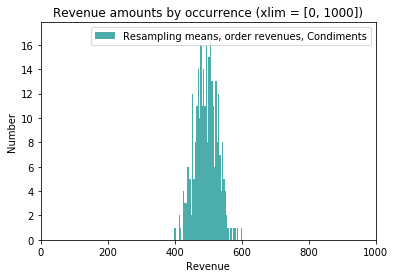

In [259]:
cond_means = sampling_mean(df_cond.Revenue)
mean_cond_means = np.mean(cond_means[0])
std_cond_means = np.std(cond_means[1])
print(f"The mean of the means of Condiments order revenues resampling is {round(mean_cond_means,2)}")
print(f"The std deviation of the means of Condiments order revenues resampling is {round(std_cond_means,2)}")
hist_plot1(cond_means[0], label="Resampling means, order revenues, Condiments",  xlim=([0, 1000]), print_stmt=False)
series2 = cond_means[0]


The mean of the means of Confections order revenues resampling is 499.91
The std deviation of the means of Confections order revenues resampling is 109.15


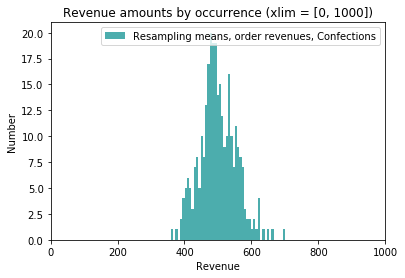

In [260]:
confect_means = sampling_mean(df_confect.Revenue)
mean_confect_means = np.mean(confect_means[0])
std_confect_means = np.std(confect_means[1])
print(f"The mean of the means of Confections order revenues resampling is {round(mean_confect_means,2)}")
print(f"The std deviation of the means of Confections order revenues resampling is {round(std_confect_means,2)}")
hist_plot1(confect_means[0], label="Resampling means, order revenues, Confections", xlim=([0, 1000]), print_stmt=False)
series3 = confect_means[0]


The mean of the means of Meat/Poultry order revenues resampling is 941.95
The std deviation of the means of Meat/Poultry order revenues resampling is 181.77


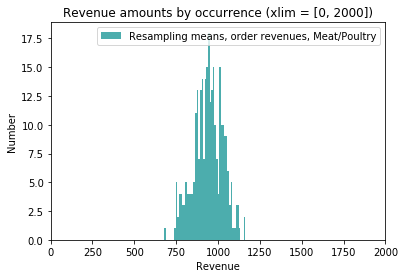

In [261]:
meat_means = sampling_mean(df_meat.Revenue)
mean_meat_means = np.mean(meat_means[0])
std_meat_means = np.std(meat_means[1])
round(mean_meat_means,2)
print(f"The mean of the means of Meat/Poultry order revenues resampling is {round(mean_meat_means,2)}")
print(f"The std deviation of the means of Meat/Poultry order revenues resampling is {round(std_meat_means,2)}")
hist_plot1(meat_means[0], label="Resampling means, order revenues, Meat/Poultry", xlim=([0, 2000]), print_stmt=False)
series4 = meat_means[0]


The mean of the means of Dairy Products order revenues resampling is 636.83
The std deviation of the means of Dairy Products order revenues resampling is 114.12


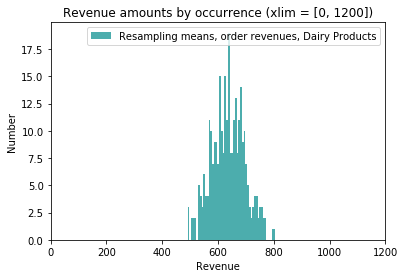

In [262]:
dairy_means = sampling_mean(df_dairy.Revenue)
mean_dairy_means = np.mean(dairy_means[0])
std_dairy_means = np.std(dairy_means[1])
round(mean_dairy_means,2)
print(f"The mean of the means of Dairy Products order revenues resampling is {round(mean_dairy_means,2)}")
print(f"The std deviation of the means of Dairy Products order revenues resampling is {round(std_dairy_means,2)}")
hist_plot1(dairy_means[0], label="Resampling means, order revenues, Dairy Products", xlim=([0, 1200]), print_stmt=False)
series5 = dairy_means[0]


The mean of the means of Grains/Cereals Products order revenues resampling is 485.91
The std deviation of the means of Grains/Cereals Products order revenues resampling is 78.41


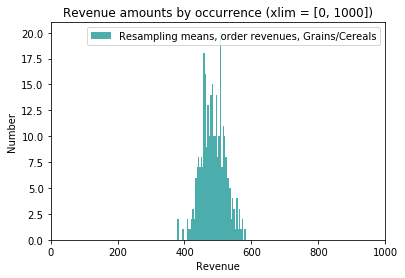

In [263]:
grains_means = sampling_mean(df_grains.Revenue)
mean_grains_means = np.mean(grains_means[0])
std_grains_means = np.std(grains_means[1])
round(mean_grains_means,2)
print(f"The mean of the means of Grains/Cereals Products order revenues resampling is {round(mean_grains_means,2)}")
print(f"The std deviation of the means of Grains/Cereals Products order revenues resampling is {round(std_grains_means,2)}")
hist_plot1(grains_means[0], label="Resampling means, order revenues, Grains/Cereals", xlim=([0, 1000]), print_stmt=False)
series6 = grains_means[0]


The mean of the means of Produce order revenues resampling is 735.19
The std deviation of the means of Produce order revenues resampling is 91.97


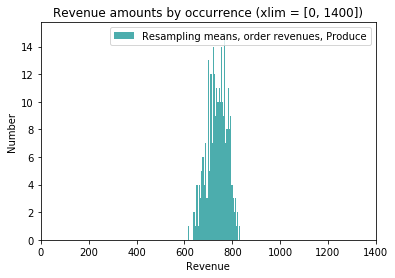

In [264]:
produce_means = sampling_mean(df_produce.Revenue)
mean_produce_means = np.mean(produce_means[0])
std_produce_means = np.std(produce_means[1])
round(mean_produce_means,2)
print(f"The mean of the means of Produce order revenues resampling is {round(mean_produce_means,2)}")
print(f"The std deviation of the means of Produce order revenues resampling is {round(std_produce_means,2)}")
hist_plot1(produce_means[0], label="Resampling means, order revenues, Produce", xlim=([0, 1400]), print_stmt=False)
series7 = produce_means[0]


The mean of the means of Seafood order revenues resampling is 398.72
The std deviation of the means of Seafood order revenues resampling is 60.31


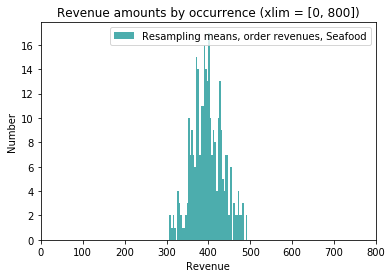

In [265]:
seafood_means = sampling_mean(df_seafood.Revenue)
mean_seafood_means = np.mean(seafood_means[0])
std_seafood_means = np.std(seafood_means[1])
round(mean_seafood_means,2)
print(f"The mean of the means of Seafood order revenues resampling is {round(mean_seafood_means,2)}")
print(f"The std deviation of the means of Seafood order revenues resampling is {round(std_seafood_means,2)}")
hist_plot1(seafood_means[0], label="Resampling means, order revenues, Seafood", xlim=([0, 800]), print_stmt=False)
series8 = seafood_means[0]


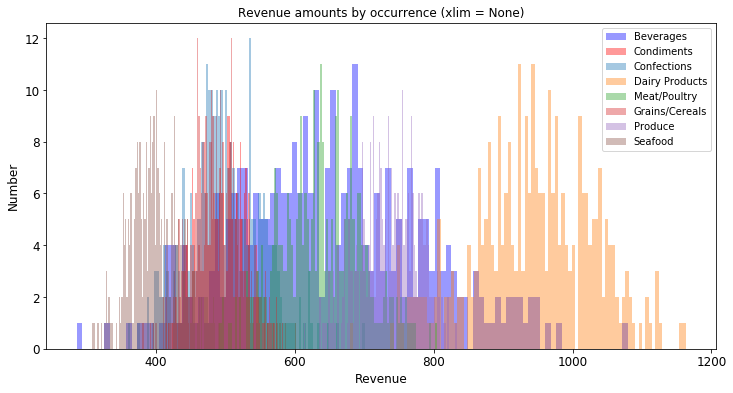

In [266]:
plt.figure(figsize=(12,6))
hist_plot8(series1, series2, series3, series4, series5, series6, 
           series7, series8, label="Beverages", label1="Condiments", 
           label2="Confections", label3="Dairy Products", label4="Meat/Poultry", 
           label5="Grains/Cereals", label6="Produce", label7="Seafood", 
           color1='b', color2='r', alpha=0.4, bins=100, xlim=None, 
           ylim=None,  fontsize=12)



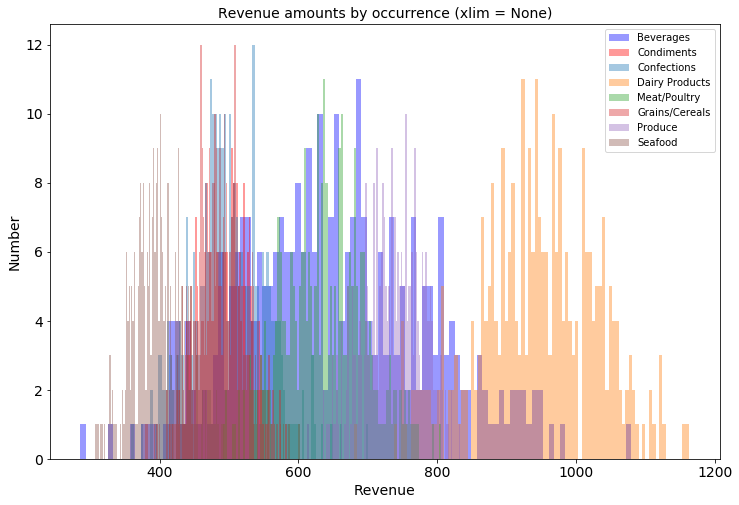

In [267]:
plt.figure(figsize=(12,8))
hist_plot8(series1, series2, series3, series4, series5, series6, 
           series7, series8, label="Beverages", label1="Condiments", 
           label2="Confections", label3="Dairy Products", label4="Meat/Poultry", 
           label5="Grains/Cereals", label6="Produce", label7="Seafood", 
           color1='b', color2='r', alpha=0.4, bins=100, xlim=None, 
           ylim=None,  fontsize=14)


### Average order revenue by product category

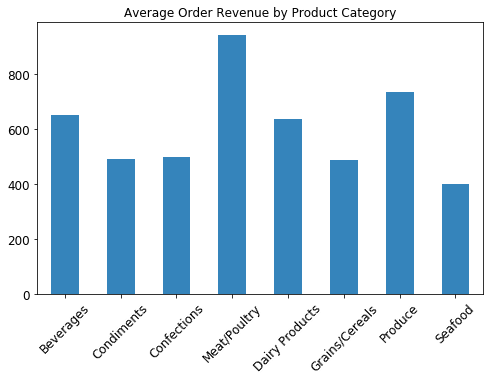

In [268]:
means = [mean_bev_means, mean_cond_means, mean_confect_means, mean_meat_means, 
         mean_dairy_means, mean_grains_means, mean_produce_means, mean_seafood_means]

names = ['Beverages', 'Condiments', 'Confections', 
         'Meat/Poultry', 'Dairy Products', 'Grains/Cereals',
        'Produce','Seafood']

df_means = pd.DataFrame(means, names)

df_means.plot(kind='bar', color='tab:blue', alpha=.9, legend=None, title ="Average Order Revenue by Product Category", figsize=(8, 5), fontsize=12)
plt.xticks(rotation=45)
plt.show()

### ANOVA test on means distributions

In [270]:
scs.f_oneway(bev_means[0], cond_means[0], confect_means[0], meat_means[0], dairy_means[0], grains_means[0], produce_means[0], seafood_means[0])


F_onewayResult(statistic=1907.2049016165422, pvalue=0.0)

The ANOVA test on the sample means shows an infinitesimally small p-value, meaning that we should reject the null hypothesis that there is no statistically significant difference among the revenue distributions of the different product categories.

To find out which distributions are different enough from one another to be statistically significant, I will run Tukey's test.

### Tukey's test on means distributions

In [271]:
bev_means_np = np.array(bev_means[0])
cond_means_np = np.array(cond_means[0]) 
confect_means_np = np.array(confect_means[0])
dairy_means_np = np.array(dairy_means[0])
meat_means_np = np.array(meat_means[0]) 
grains_means_np = np.array(grains_means[0])
produce_means_np = np.array(produce_means[0]) 
seafood_means_np = np.array(seafood_means[0])

v = np.concatenate([bev_means_np, cond_means_np, confect_means_np,
                    dairy_means_np, meat_means_np, grains_means_np, 
                    produce_means_np, seafood_means_np])
labels = ['Beverages'] * len(bev_means_np) + ['Condiments'] * len(cond_means_np) + ['Confections'] * len(confect_means_np) + ['Dairy Products']*len(dairy_means_np) + ['Meat/Poultry']*len(meat_means_np) + ['Cereals/Grains']*len(grains_means_np) + ['Produce']*len(produce_means_np) + ['Seafood']*len(seafood_means_np)
tukey_results = pairwise_tukeyhsd(v, labels, 0.05)
print(tukey_results)

type(tukey_results)

        Multiple Comparison of Means - Tukey HSD,FWER=0.05        
    group1         group2      meandiff   lower     upper   reject
------------------------------------------------------------------
  Beverages    Cereals/Grains -164.8895 -182.0619 -147.7171  True 
  Beverages      Condiments   -157.7579 -174.9303 -140.5854  True 
  Beverages     Confections   -150.8871 -168.0595 -133.7146  True 
  Beverages    Dairy Products  -13.9659  -31.1383   3.2066  False 
  Beverages     Meat/Poultry   291.1503  273.9778  308.3227  True 
  Beverages       Produce      84.3982   67.2258   101.5707  True 
  Beverages       Seafood     -252.0757 -269.2482 -234.9033  True 
Cereals/Grains   Condiments     7.1316   -10.0408  24.3041  False 
Cereals/Grains  Confections    14.0024    -3.17    31.1749  False 
Cereals/Grains Dairy Products  150.9236  133.7512  168.0961  True 
Cereals/Grains  Meat/Poultry   456.0398  438.8673  473.2122  True 
Cereals/Grains    Produce      249.2877  232.1153  266.4602  T

statsmodels.sandbox.stats.multicomp.TukeyHSDResults

### Effect size:  Cohen's D

We can get a sense of the magnitude of the statistically significant differences among the product categories by computing and plotting Cohen's d for each pair.

This Cohen's d result (1.58783533) represents a difference of 1.59 pooled standard deviations between the two groups, and suggests a **large** effect size.


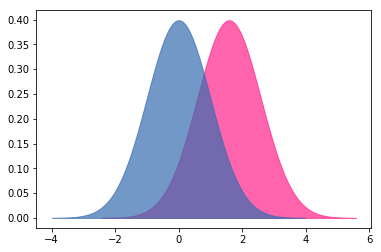

In [272]:
d_bev_cond = Cohen_d(bev_means_np, cond_means_np)
plot_pdfs(d_bev_cond)

This Cohen's d result (0.13256716) represents a difference of 0.13 pooled standard deviations between the two groups, and suggests a **small** effect size.


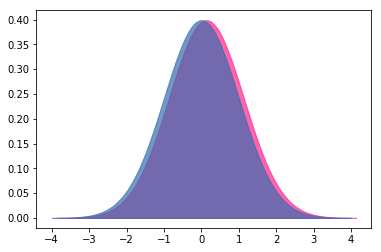

In [273]:
d_bev_dairy = Cohen_d(bev_means_np, dairy_means_np)
plot_pdfs(d_bev_dairy)

This Cohen's d result (-2.54390082) represents a difference of -2.54 pooled standard deviations between the two groups, and suggests a **large** effect size.


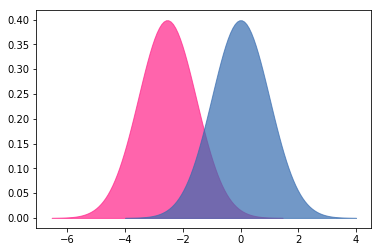

In [274]:
d_bev_meat = Cohen_d(bev_means_np, meat_means_np)
plot_pdfs(d_bev_meat)

This Cohen's d result (1.65391997) represents a difference of 1.65 pooled standard deviations between the two groups, and suggests a **large** effect size.


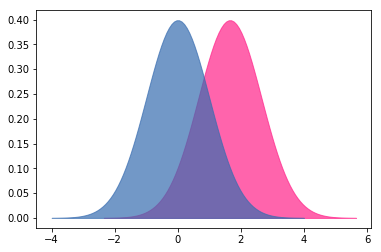

In [275]:
d_bev_grains = Cohen_d(bev_means_np, grains_means_np)
plot_pdfs(d_bev_grains)

This Cohen's d result (-0.83661892) represents a difference of -0.84 pooled standard deviations between the two groups, and suggests a **large** effect size.


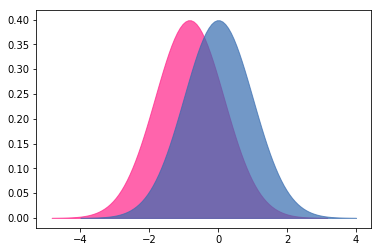

In [276]:
d_bev_produce = Cohen_d(bev_means_np, produce_means_np)
plot_pdfs(d_bev_produce)

This Cohen's d result (2.5252898) represents a difference of 2.53 pooled standard deviations between the two groups, and suggests a **large** effect size.


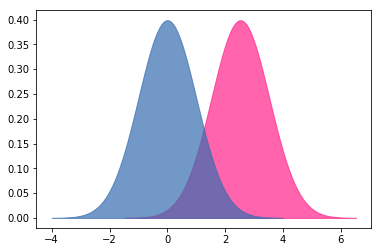

In [277]:
d_bev_seafood = Cohen_d(bev_means_np, seafood_means_np)
plot_pdfs(d_bev_seafood)

This Cohen's d result (-0.15213832) represents a difference of -0.15 pooled standard deviations between the two groups, and suggests a **small** effect size.


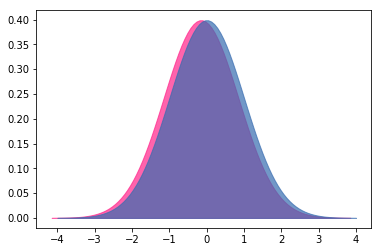

In [278]:
d_cond_confect = Cohen_d(cond_means_np, confect_means_np)
plot_pdfs(d_cond_confect)

This Cohen's d result (-2.93969727) represents a difference of -2.94 pooled standard deviations between the two groups, and suggests a **large** effect size.


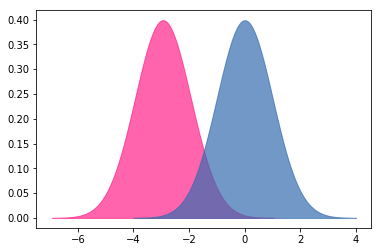

In [279]:
d_cond_dairy = Cohen_d(cond_means_np, dairy_means_np)
plot_pdfs(d_cond_dairy)

This Cohen's d result (-6.77296449) represents a difference of -6.77 pooled standard deviations between the two groups, and suggests a **large** effect size.


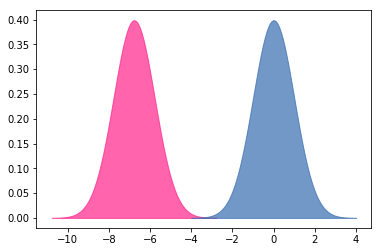

In [280]:
d_cond_meat = Cohen_d(cond_means_np, meat_means_np)
plot_pdfs(d_cond_meat)

This Cohen's d result (0.20306528) represents a difference of 0.2 pooled standard deviations between the two groups, and suggests a **small** effect size.


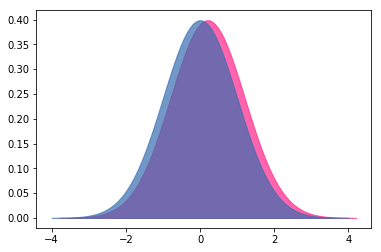

In [281]:
d_cond_grains = Cohen_d(cond_means_np, grains_means_np)
plot_pdfs(d_cond_grains)

This Cohen's d result (-6.31401733) represents a difference of -6.31 pooled standard deviations between the two groups, and suggests a **large** effect size.


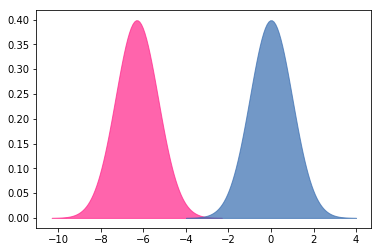

In [282]:
d_cond_produce = Cohen_d(cond_means_np, produce_means_np)
plot_pdfs(d_cond_produce)

This Cohen's d result (2.65898473) represents a difference of 2.66 pooled standard deviations between the two groups, and suggests a **large** effect size.


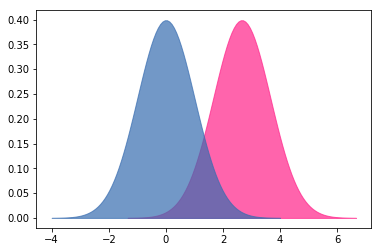

In [283]:
d_cond_seafood = Cohen_d(cond_means_np, seafood_means_np)
plot_pdfs(d_cond_seafood)

This Cohen's d result (-2.39556674) represents a difference of -2.4 pooled standard deviations between the two groups, and suggests a **large** effect size.


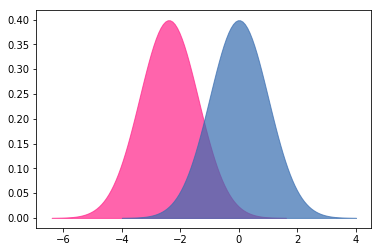

In [284]:
d_confect_dairy = Cohen_d(confect_means_np, dairy_means_np)
plot_pdfs(d_confect_dairy)

This Cohen's d result (-6.09071957) represents a difference of -6.09 pooled standard deviations between the two groups, and suggests a **large** effect size.


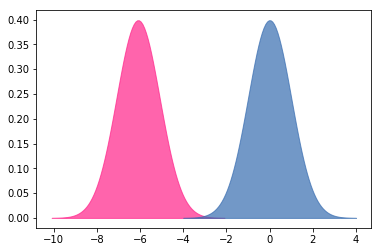

In [285]:
d_confect_meat = Cohen_d(confect_means_np, meat_means_np)
plot_pdfs(d_confect_meat)

This Cohen's d result (0.30500232) represents a difference of 0.31 pooled standard deviations between the two groups, and suggests a **small** effect size.


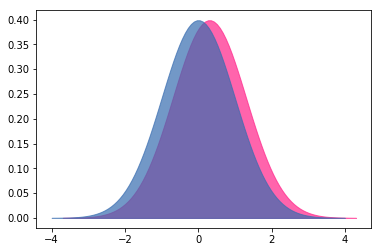

In [286]:
d_confect_grains = Cohen_d(confect_means_np, grains_means_np)
plot_pdfs(d_confect_grains)

This Cohen's d result (-4.85859512) represents a difference of -4.86 pooled standard deviations between the two groups, and suggests a **large** effect size.


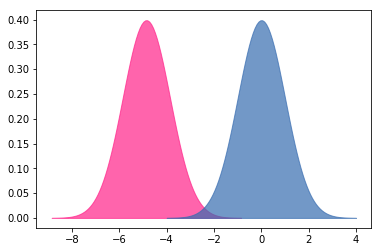

In [287]:
d_confect_produce = Cohen_d(confect_means_np, produce_means_np)
plot_pdfs(d_confect_produce)

This Cohen's d result (2.19124278) represents a difference of 2.19 pooled standard deviations between the two groups, and suggests a **large** effect size.


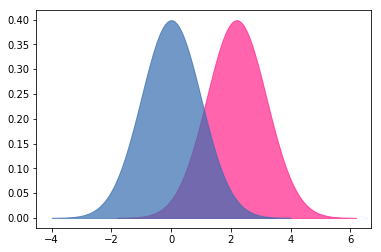

In [288]:
d_confect_seafood = Cohen_d(confect_means_np, seafood_means_np)
plot_pdfs(d_confect_seafood)

This Cohen's d result (-4.06994506) represents a difference of -4.07 pooled standard deviations between the two groups, and suggests a **large** effect size.


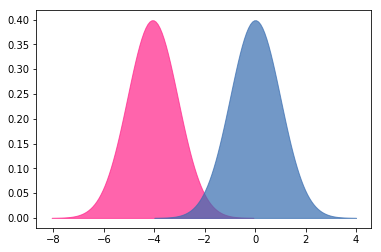

In [289]:
d_dairy_meat = Cohen_d(dairy_means_np, meat_means_np)
plot_pdfs(d_dairy_meat)

This Cohen's d result (3.04249992) represents a difference of 3.04 pooled standard deviations between the two groups, and suggests a **large** effect size.


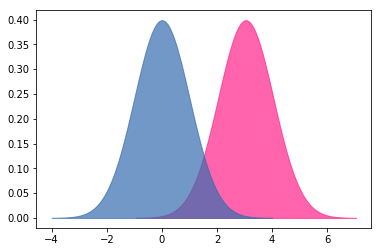

In [290]:
d_dairy_grains = Cohen_d(dairy_means_np, grains_means_np)
plot_pdfs(d_dairy_grains)

This Cohen's d result (-1.89366848) represents a difference of -1.89 pooled standard deviations between the two groups, and suggests a **large** effect size.


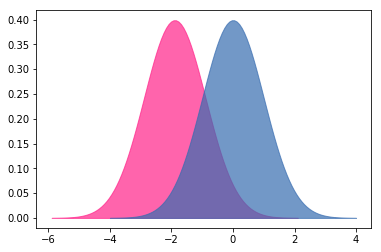

In [291]:
d_dairy_produce = Cohen_d(dairy_means_np, produce_means_np)
plot_pdfs(d_dairy_produce)

This Cohen's d result (4.77608941) represents a difference of 4.78 pooled standard deviations between the two groups, and suggests a **large** effect size.


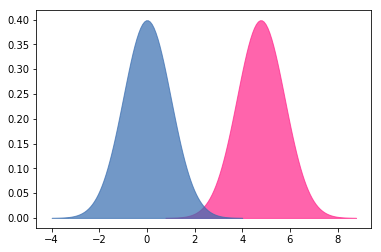

In [292]:
d_dairy_seafood = Cohen_d(dairy_means_np, seafood_means_np)
plot_pdfs(d_dairy_seafood)

This Cohen's d result (6.82784287) represents a difference of 6.83 pooled standard deviations between the two groups, and suggests a **large** effect size.


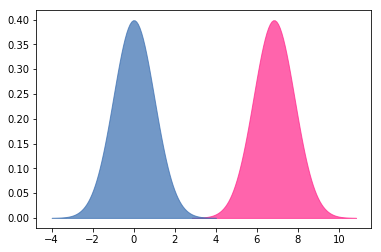

In [293]:
d_meat_grains = Cohen_d(meat_means_np, grains_means_np)
plot_pdfs(d_meat_grains)

This Cohen's d result (3.01625739) represents a difference of 3.02 pooled standard deviations between the two groups, and suggests a **large** effect size.


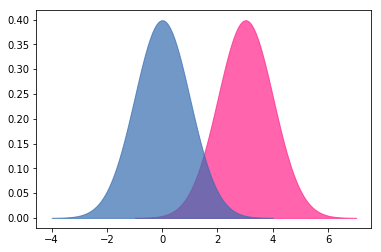

In [294]:
d_meat_produce = Cohen_d(meat_means_np, produce_means_np)
plot_pdfs(d_meat_produce)

This Cohen's d result (8.11067767) represents a difference of 8.11 pooled standard deviations between the two groups, and suggests a **large** effect size.


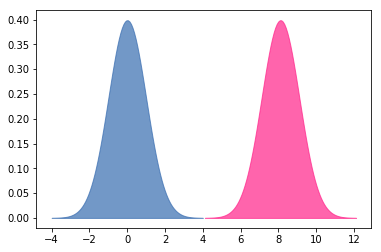

In [295]:
d_meat_seafood = Cohen_d(meat_means_np, seafood_means_np)
plot_pdfs(d_meat_seafood)

This Cohen's d result (-6.35452513) represents a difference of -6.35 pooled standard deviations between the two groups, and suggests a **large** effect size.


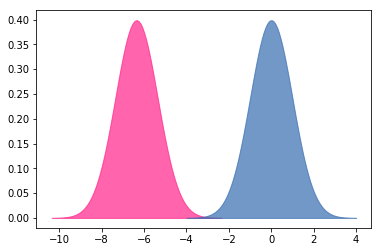

In [296]:
d_grains_produce = Cohen_d(grains_means_np, produce_means_np)
plot_pdfs(d_grains_produce)

This Cohen's d result (2.39399617) represents a difference of 2.39 pooled standard deviations between the two groups, and suggests a **large** effect size.


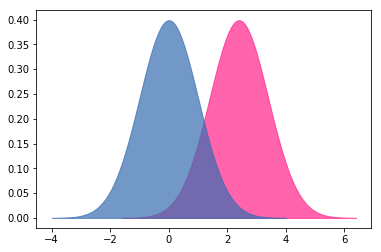

In [297]:
d_grains_seafood = Cohen_d(grains_means_np, seafood_means_np)
plot_pdfs(d_grains_seafood)

This Cohen's d result (8.50866141) represents a difference of 8.51 pooled standard deviations between the two groups, and suggests a **large** effect size.


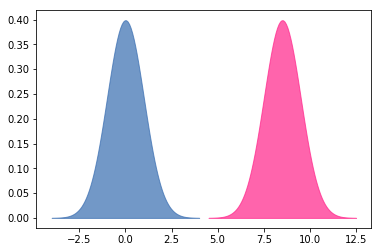

In [298]:
d_produce_seafood = Cohen_d(produce_means_np, seafood_means_np)
plot_pdfs(d_produce_seafood)

## Findings and interpretation

The results of Tukey's test suggest that the magnitude of the differences of the distribution of means for each product category is statistically significant for all but a few category pairings:  Cereals/Grains and Condiments; Cereals/Grains and Confections; Condiments and Confections; and possibly one or two other pairings (have seen Beverages and Dairy Products not being statistically significant on occasion).  This result is interesting--but not really surprising--in light of what is shown in the bar graph of revenues by category:  the three categories represented by the first three pairing above are the most shelf-stable, and relatively inexpensive, of the 8 product categories.  They also are discounted relatively less frequently than most other categories (with the possible exception of produce), probably due to lower rates of spoilage, therefore requiring fewer discounts to move products before they spoil.  

In addition, we see some very large differences in average order value among certain product categories.  The bar chart showing the average order revenue by category shows that in an intuitive manner; Tukey's test and Cohen's d tell us which differences are statistically significant (all but 4) and to what degree.  

This last point on the value of Cohen's d is important:  while you can see differences in the original bar chart across product categories, it's interesting to note that the difference shown by Cohen's d are sometimes more or less dramatic than the bar chart implies.  

As a reminder, here is the bar chart of average order revenue by product category:

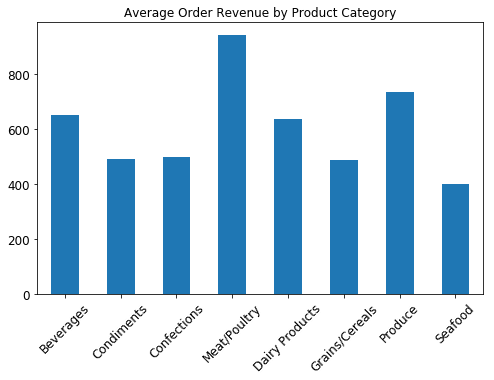

In [299]:
df_means.plot(kind='bar', legend=None, title ="Average Order Revenue by Product Category", figsize=(8, 5), fontsize=12)
plt.xticks(rotation=45)
plt.show()

While there is a notable difference on the bar chart between, say, Produce and Condiments, the Cohen's d value for this pair is 6.65!  That's close to 7 pooled standard deviations separating the means of these two categories.  That suggests that the difference between these two is even more significant than this bar chart would suggest.  This is instructive because it can help us identify under- or over-performing categories on which to focus specific incentives.

# Future potential work:  Additional questions

I have a number of general questions that I would like to explore.  Below are a few that I had started to investigate, but did not have time to complete.

## Sixth possible question

We have seen that there are substantial differences in the revenues and discounts offered across the 8 categories.  But what about within categories?  Do the discounts within categories vary by product?

### Null and alternative hypotheses for fourth question 

-  **Null hypothesis:**  No significant difference among the means of discount values by product within a category

    -  Ho:  $\mu_1 = \mu_2 = \mu_3 ... = \mu_i$)


-  **Alternative hypothesis:** Differences among the means of discount values by product within a category are unlikely to be due to chance  

    -  Ha:  $\mu_1 \neq \mu_2 \neq \mu_3 \neq ... \neq \mu_i$


### EDA

###  High-level overview:  Beverages

Looking at the distribution of revenues in this category by discount...

In [300]:
df_bev = df.loc[df["CategoryName"] == "Beverages"]


In [301]:
df_bev.groupby(['Discount']).sum().sort_values(['Discount'])


,Id,ProductId,OrderUnitPrice,OrderQty,CategoryId,Revenue,RevPercentTotal,RevFractionTotal
Discount,,,,,,,,
0.00,2623997,10381,7161.95,5116,246,153060.250,12.092044,0.120920
0.05,277313,1038,1507.75,898,26,43567.380,3.441904,0.034419
0.10,264816,1219,812.20,728,25,13027.635,1.029207,0.010292
0.15,384608,1348,609.65,885,36,12889.995,1.018334,0.010183
0.20,418197,1353,1005.40,1140,39,29569.320,2.336031,0.023360
0.25,343213,1017,714.70,765,32,15753.600,1.244564,0.012446


In [302]:
df_bev_dsc = df_bev.drop(['Id', 'ProductId', 'OrderUnitPrice', 'OrderQty', 'RevPercentTotal', 'RevFractionTotal', 'CustomerId', 'OrderDate', 'CategoryName', 'CatDescription'], axis=1)
df_bev_dsc.head()

,Discount,ProductName,CategoryId,Revenue
0,0.20,Chai,1,518.4
1,0.00,Chai,1,259.2
2,0.00,Chai,1,288.0
3,0.15,Chai,1,183.6
4,0.00,Chai,1,172.8


We can see that the largest revenue category by far, with over \\$150,000 is 0% discount, followed by approximately \\$40,000 for the 5% discount grouping (almost all of the discounts in the 5-9.9% discount group are 5% discounts).  

###  Detailed breakdown:  Beverages

Let's take a look at the details of discounts in Beverages, sorting by discount level and product name:

In [303]:
df_bev = df.loc[df['CategoryName']=="Beverages"]

df_bev.groupby(['Discount', 'ProductName']).sum().sort_values(['Discount']).head(20)

Id  ProductId  OrderUnitPrice  \
Discount ProductName                                                    
0.00     Chai                       235242         22          374.40   
         Steeleye Stout             266316        875          424.80   
         Sasquatch Ale              128134        408          156.80   
         Rhönbräu Klosterbier       308816       2175          212.35   
         Laughing Lumberjack Lager   75320        469           98.00   
         Lakkalikööri               277308       1976          446.40   
         Outback Lager              245338       1610          324.00   
         Guaraná Fantástica         353001        792          139.50   
         Côte de Blaye              150244        532         3530.90   
         Chartreuse verte           169736        624          266.40   
         Chang                      202413         38          342.00   
         Ipoh Coffee                212129        860          846.40   
0.05     Outback Lager               31973        210           45.00   
         Steeleye Stout              11046         35           18.00   
         Sasquatch Ale               31849        102           36.40   
         Rhönbräu Klosterbier        32633        225           23.25   
         Ipoh Coffee                 10340         43           36.80   
         Lakkalikööri                10273         76           14.40   
         Côte de Blaye               52977        190         1212.10   
         Chartreuse verte            21942         78           36.00   

                                    OrderQty  CategoryId    Revenue  \
Discount ProductName                                                  
0.00     Chai                            391          22   6681.600   
         Steeleye Stout                  531          25   8812.800   
         Sasquatch Ale                   269          12   3542.000   
         Rhönbräu Klosterbier            631          29   4642.250   
         Laughing Lumberjack Lager       115           7   1610.000   
         Lakkalikööri                    591          26  10234.800   
         Outback Lager                   438          23   6129.000   
         Guaraná Fantástica              704          33   3011.400   
         Côte de Blaye                   320          14  79577.000   
         Chartreuse verte                343          16   5677.200   
         Chang                           408          19   7125.000   
         Ipoh Coffee                     375          20  16017.200   
0.05     Outback Lager                    63           3    897.750   
         Steeleye Stout                   18           1    307.800   
         Sasquatch Ale                   135           3   1675.800   
         Rhönbräu Klosterbier            210           3   1546.125   
         Ipoh Coffee                      40           1   1398.400   
         Lakkalikööri                     33           1    451.440   
         Côte de Blaye                   145           5  34294.525   
         Chartreuse verte                 82           2   1402.200   

                                    RevPercentTotal  RevFractionTotal  
Discount ProductName                                                   
0.00     Chai                              0.527859          0.005279  
         Steeleye Stout                    0.696228          0.006962  
         Sasquatch Ale                     0.279825          0.002798  
         Rhönbräu Klosterbier              0.366746          0.003667  
         Laughing Lumberjack Lager         0.127193          0.001272  
         Lakkalikööri                      0.808568          0.008086  
         Outback Lager                     0.484202          0.004842  
         Guaraná Fantástica                0.237906          0.002379  
         Côte de Blaye                     6.286731          0.062867  
         Chartreuse verte                  0.448509          0.004485  
      

Now let's sort by product name and revenue, to see which products bring in the most revenue.  

Note:  because CategoryId for all beverages is 1, the number in the CategoryId column represents the total number of orders of that product.  For example, there were 24 orders for Cote de Blaye, 28 orders for Ipoh Coffee, etc.

We see Cote de Blaye is at the top of the list for revenues by a large margin, followed by Ipoh Coffee, Chang, Lakkalikööri, and Steeleye Stout.  

In [304]:
df_bev.groupby(['ProductName']).sum().sort_values(['Revenue'], ascending=False)

,Id,ProductId,OrderUnitPrice,OrderQty,Discount,CategoryId,Revenue,RevPercentTotal,RevFractionTotal
ProductName,,,,,,,,,
Côte de Blaye,255583,912,5902.40,623,1.10,24,141396.735,11.170605,0.111706
Ipoh Coffee,298531,1204,1205.20,580,1.40,28,23526.700,1.858653,0.018587
Chang,470965,88,786.60,1057,4.50,44,16355.960,1.292151,0.012922
Lakkalikööri,415841,2964,662.40,981,2.05,39,15760.440,1.245104,0.012451
Steeleye Stout,383553,1260,612.00,883,1.70,36,13644.000,1.077901,0.010779
Chai,406841,38,651.60,828,2.95,38,12788.100,1.010284,0.010103
Chartreuse verte,318790,1170,500.40,793,2.00,30,12294.540,0.971291,0.009713
Outback Lager,416162,2730,552.00,817,2.45,39,10672.650,0.843159,0.008432
Rhönbräu Klosterbier,490967,3450,339.45,1155,2.40,46,8177.490,0.646037,0.006460


In [305]:
df_bev.groupby(['ProductName', 'Discount']).sum().sort_values(['ProductName'], ascending=True)

Id  ProductId  OrderUnitPrice  \
ProductName               Discount                                      
Chai                      0.00      235242         22          374.40   
                          0.05       10905          1           18.00   
                          0.10       11025          1           18.00   
                          0.15       53177          5           82.80   
                          0.20       42354          4           68.40   
                          0.25       54138          5           90.00   
Chang                     0.00      202413         38          342.00   
                          0.05       32270          6           57.00   
                          0.10       10485          2           15.20   
                          0.15       53993         10           87.40   
                          0.20      106974         20          174.80   
                          0.25       64830         12          110.20   
Chartreuse verte          0.25       21120         78           32.40   
                          0.20       21501         78           36.00   
                          0.15       42407        156           64.80   
                          0.05       21942         78           36.00   
                          0.00      169736        624          266.40   
                          0.10       42084        156           64.80   
Côte de Blaye             0.00      150244        532         3530.90   
                          0.05       52977        190         1212.10   
                          0.10       21213         76          527.00   
                          0.20       20777         76          421.60   
                          0.25       10372         38          210.80   
Guaraná Fantástica        0.00      353001        792          139.50   
                          0.05       31105         72           10.80   
                          0.10       31552         72           12.60   
                          0.15       42213         96           17.10   
                          0.20       32203         72           13.50   
                          0.25       54712        120           22.50   
Ipoh Coffee               0.20       21975         86           92.00   
...                                    ...        ...             ...   
Lakkalikööri              0.15       63760        456           97.20   
                          0.20       21584        152           36.00   
                          0.25       21262        152           32.40   
Laughing Lumberjack Lager 0.00       75320        469           98.00   
                          0.15       10939         67           14.00   
                          0.20       10923         67           14.00   
                          0.25       10284         67           11.20   
Outback Lager             0.20       32933        210           45.00   
                          0.15       21557        140           30.00   
                          0.25       42497        280           57.00   
                          0.05       31973        210           45.00   
                          0.00      245338       1610          324.00   
                          0.10       41864        280           51.00   
Rhönbräu Klosterbier      0.00      308816       2175          212.35   
                          0.05       32633        225           23.25   
                          0.10       53081        375           37.20   
                          0.15       21306        150           13.95   
                          0.20       64671        450           46.50   
                          0.25       10460         75            6.20   
Sasquatch Ale             0.25       10548         34           14.00   
                          0.20       21138         68           25.20   
                          0.00      128134        408          156.80   
                         

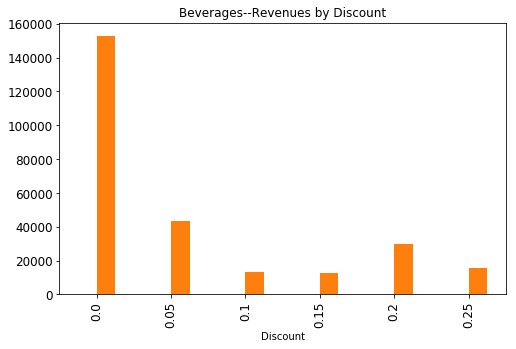

In [306]:
# df_bev.groupby(['ProductName', 'Discount']).sum().sort_values(['ProductName'], ascending=True)

df_bev_dsc.groupby(['Discount']).sum().sort_values(['Discount']).plot(kind='bar', 
            title ="Beverages--Revenues by Discount", legend=False, figsize=(8, 5), fontsize=12)

plt.show()


### Observations and comments on revenues by discount within the Beverages category

We can see that virtually every product in this category is sold at almost all discount levels (including 0%).  With more time, I would like to explore the distributions of revenues by discount level for each named product, and run tests (Tukey's test, among others) to figure out whether those distributions differ significantly across product name.  

For example, within the Beverage category, I noticed an interesting distribution of revenues by discount level for Cote de Blaye (which is an expensive wine product and is the largest single product by revenue in the Beverages category).  

In [307]:
df.loc[df.ProductName == "Côte de Blaye"].head(4)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
966,10329,SPLIR,2012-10-15,38,210.8,20,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",4005.2,0.316418,0.003164
967,10351,ERNSH,2012-11-11,38,210.8,20,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",4005.2,0.316418,0.003164
968,10353,PICCO,2012-11-13,38,210.8,50,0.20,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",8432.0,0.666144,0.006661
969,10360,BLONP,2012-11-22,38,210.8,10,0.00,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",2108.0,0.166536,0.001665


_Grouping by discount level and sorting on revenues:_

In [308]:
df_bev.groupby(['ProductName']).sum()
df_bev.loc[df['ProductName'] == 'Côte de Blaye']
df_bev_cote = df_bev.loc[df['ProductName'] == 'Côte de Blaye']
# df_bev_cote.groupby(['Discount', 'Revenue']).sum()

df_bev_cote.groupby(['Discount']).sum()


df_bev_cote_disc_rev = df_bev_cote.drop(columns=['Id', 'ProductId', 'OrderUnitPrice', 'RevPercentTotal', 'RevFractionTotal'])
df_bev_cote_disc_rev.rename(columns={'CategoryId': 'Number of Orders'})
print("Revenue totals sorted by discount, Cote de Blaye")
df_bev_cote_disc_rev.groupby(['Discount']).sum().sort_values(['Revenue'], ascending=False)

# Note that, since the CategoryId for Beverages is '1' and each row
# represents a summation of each item, the number showing in the 
# CategoryId column represents the number of orders placed at that 
# discount level.  OrderQty is the total number of units purchased
# across all orders at that discount level.

Revenue totals sorted by discount, Cote de Blaye


,OrderQty,CategoryId,Revenue
Discount,,,
0.00,320,14,79577.000
0.05,145,5,34294.525
0.20,99,2,16695.360
0.25,40,1,6324.000
0.10,19,2,4505.850


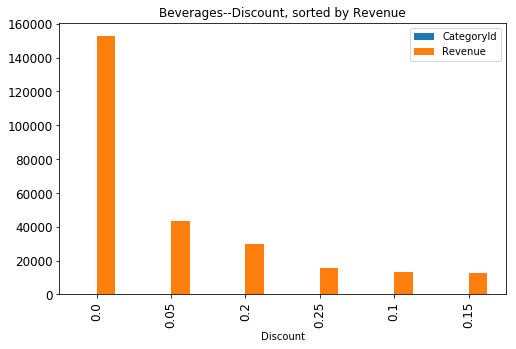

In [309]:
df_bev_dsc.groupby(['Discount']).sum().sort_values(['Revenue'], ascending=False).plot(kind='bar', 
            title ="Beverages--Discount, sorted by Revenue", figsize=(8, 5), fontsize=12)
plt.show()

### Côte de Blaye:  observations and comments on revenues by discount

Sorting revenues by discount level, we can see that the greatest order revenues occurred at 0% and 5% discount, with the next highest order revenues occurring at 20% and 25% and relatively low order revenues at the 10% or 15% level.  
-  Almost \\$80,000 of total sales of the product occurred without any discount.  
-  The next highest revenues for the product (almost \\$40,000) were made at the 5% discount level.  
-  The third highest revenues of over \\$16,000 were made with a 20\% discount applied.  
-  Over \\$6300 was made at the 25% discount level.  
-  Finally, just over \\$4000 in revenues was realized on product at the 10\% level.  (No product was sold at the 15\% discount level.)

I was curious to know if the date of the sale had any bearing on these sales figures.  I thought that perhaps seasonality might be at play.  Below is the dataset for this product, sorted by discount.

In [310]:
df.loc[df.ProductName == "Côte de Blaye"].sort_values(['Discount'], ascending=False)


,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
970,10372,QUEE,2012-12-04,38,210.8,40,0.25,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",6324.000,0.499608,0.004996
968,10353,PICCO,2012-11-13,38,210.8,50,0.20,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",8432.000,0.666144,0.006661
972,10424,MEREP,2013-01-23,38,210.8,49,0.20,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",8263.360,0.652821,0.006528
978,10672,BERGS,2013-09-17,38,263.5,15,0.10,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",3557.250,0.281029,0.002810
976,10541,HANAR,2013-05-19,38,263.5,4,0.10,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",948.600,0.074941,0.000749
985,10865,QUICK,2014-02-02,38,263.5,60,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",15019.500,1.186568,0.011866
981,10816,GREAL,2014-01-06,38,263.5,30,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",7509.750,0.593284,0.005933
967,10351,ERNSH,2012-11-11,38,210.8,20,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",4005.200,0.316418,0.003164
977,10616,GREAL,2013-07-31,38,263.5,15,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",3754.875,0.296642,0.002966
966,10329,SPLIR,2012-10-15,38,210.8,20,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",4005.200,0.316418,0.003164


The three largest discounts were given on sales between November 1, 2012 and January 31, 2013.  I also noticed that a few other discounted sales were made at the end of the year, but more were made at the beginning of the year.  There were also a number of non-discounted sales that happened close to the of 2014, but there were just as many--if not more--non-discounted orders at other times of the year. 

The number of datapoints in this subset of product data is quite small, which is why a robust statistical test would be challenging to run.  With more time, I would research which tests would be most likely to yield meaningful results, given the small sample size for this product.  Given the high revenues per order, it would be helpful to understand more about the sales patterns of this product--seasonality and geography in particular.  Perhaps there is unmet customer demand that could be tapped by identifying revenue potential in different geographies or at different times of the year.



In [311]:
df.loc[df.ProductName == "Côte de Blaye"].sort_values(['Revenue'], ascending=False)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
988,10981,HANAR,2014-03-27,38,263.5,60,0.00,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",15810.000,1.249019,0.012490
985,10865,QUICK,2014-02-02,38,263.5,60,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",15019.500,1.186568,0.011866
971,10417,SIMOB,2013-01-16,38,210.8,50,0.00,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",10540.000,0.832680,0.008327
986,10889,RATTC,2014-02-16,38,263.5,40,0.00,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",10540.000,0.832680,0.008327
968,10353,PICCO,2012-11-13,38,210.8,50,0.20,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",8432.000,0.666144,0.006661
972,10424,MEREP,2013-01-23,38,210.8,49,0.20,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",8263.360,0.652821,0.006528
975,10540,QUICK,2013-05-19,38,263.5,30,0.00,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",7905.000,0.624510,0.006245
982,10817,KOENE,2014-01-06,38,263.5,30,0.00,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",7905.000,0.624510,0.006245
981,10816,GREAL,2014-01-06,38,263.5,30,0.05,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",7509.750,0.593284,0.005933
989,11032,WHITC,2014-04-17,38,263.5,25,0.00,Côte de Blaye,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",6587.500,0.520425,0.005204


## Seventh possible question

Do revenues from discounts vary in a statistically significant way from revenues on non-discounted products in each product category?


### Null and alternative hypotheses 

-  **Null hypothesis:**  No significant difference between revenues from non-discounted products in a category versus revenues from discounted products in a category

    -  Ho:  $\mu_1 = \mu_2 = \mu_3 ... = \mu_i$)


-  **Alternative hypothesis:** Differences between revenues from non-discounted products in a category versus revenues from discounted products in a category are unlikely to be due to chance  

    -  Ha:  $\mu_1 \neq \mu_2 \neq \mu_3 \neq ... \neq \mu_i$


In [312]:
# dataframes:

# df_bev
# df_cond
# df_confect
# df_dairy
# df_meat
# df_grains
# df_produce
# df_seafood
# df.loc[df["CategoryName"] == "Condiments"]

### Create dataframes (discounts/no discounts), EDA, Sampling, T-tests

### Beverages:  Discounts vs. no discounts

##### Create dataframes Revenues from no discounts and Revenues from all discounts

In [313]:
df_bev_no_disc = df_bev.loc[df["Discount"] == 0]
df_bev_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
1,10294,RATTC,2012-08-30,1,14.4,18,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",259.2,0.020477,0.000205
2,10317,LONEP,2012-09-30,1,14.4,20,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",288.0,0.022753,0.000228
4,10354,PERIC,2012-11-14,1,14.4,12,0.0,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",172.8,0.013652,0.000137


In [314]:
df_bev_disc = df_bev.loc[df["Discount"] > 0]
df_bev_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
5,10370,CHOPS,2012-12-03,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145


##### EDA / Visualization

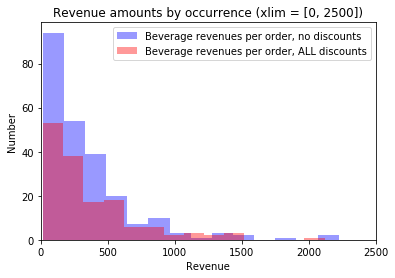

In [315]:
hist_plot2(df_bev_no_disc.Revenue, df_bev_disc.Revenue, label="Beverage revenues per order, no discounts", label1="Beverage revenues per order, ALL discounts", xlim=([0, 2500]))


##### Sampling to create normal distribution of sample means

The mean of the distribution is 633.64
The std deviation of the distribution is 469.9


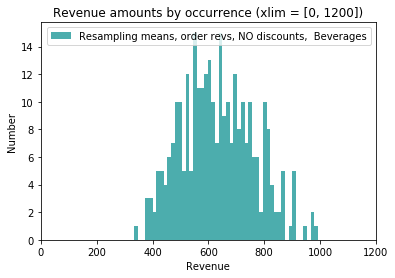

In [316]:
bev_no_disc_mean, bev_no_disc_std = sampling_mean(df_bev_no_disc.Revenue)
print(f"The mean of the distribution is {round(np.mean(bev_no_disc_mean), 2)}")
print(f"The std deviation of the distribution is {round(np.std(bev_no_disc_std), 2)}")
hist_plot1(bev_no_disc_mean, label="Resampling means, order revs, NO discounts,  Beverages", xlim=([0, 1200]), print_stmt=False)

The mean of the distribution is 724.62
The std deviation of the distribution is 345.5


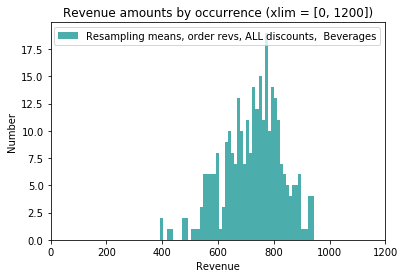

In [317]:
bev_disc_mean, bev_disc_std = sampling_mean(df_bev_disc.Revenue)
print(f"The mean of the distribution is {round(np.mean(bev_disc_mean), 2)}")
print(f"The std deviation of the distribution is {round(np.std(bev_disc_std), 2)}")
hist_plot1(bev_disc_mean, label="Resampling means, order revs, ALL discounts,  Beverages", xlim=([0, 1200]), print_stmt=False)

In [318]:
df_bev_disc.Discount.value_counts()

0.20    39
0.15    36
0.25    32
0.05    26
0.10    25
Name: Discount, dtype: int64

In [319]:
# Divide df_bev_disc into two dataframes:  5-19% and 20+%

df_bev_disc_5_15 = df_bev_disc.loc[(df['Discount'] >= 0.05) & (df['Discount'] < 0.20)]
df_bev_disc_5_15.head(3)



,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
3,10348,WANDK,2012-11-07,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
5,10370,CHOPS,2012-12-03,1,14.4,15,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",183.6,0.014505,0.000145
10,10526,WARTH,2013-05-05,1,18.0,8,0.15,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",122.4,0.009670,0.000097


In [320]:
df_bev_disc_20plus = df_bev_disc.loc[(df['Discount'] >= 0.2)]
df_bev_disc_20plus.head(3)


,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
0,10285,QUICK,2012-08-20,1,14.4,45,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",518.4,0.040955,0.000410
9,10522,LEHMS,2013-04-30,1,18.0,40,0.20,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",576.0,0.045505,0.000455
16,10646,HUNGO,2013-08-27,1,18.0,15,0.25,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",202.5,0.015998,0.000160


#### Test chosen:  t-test (2-sided, 2-sample) 

Have gotten relatively normal distributions by taking the means of multiple samples.  Need to check to make sure that variances are similar before performing the t-test.  We can use Bartlett's test in this case to check for similar variances.

In [321]:
import scipy.stats

scipy.stats.bartlett(bev_disc_mean, bev_no_disc_mean)

BartlettResult(statistic=13.214536826596179, pvalue=0.00027778613842456535)

The p-value is < 0.05, so we **_can reject the null hypothesis_** that the samples come from populations with similar or equal variances.  

In [322]:
scipy.stats.levene(bev_disc_mean, bev_no_disc_mean)

LeveneResult(statistic=15.688384489445342, pvalue=8.368299909197281e-05)

Like the Bartlett test, the Levene test evaluates two different distributions to determine whether or not they have equal variances.  The Levene test is less sensitive to normality than Bartlett's, so it is an alternative to the latter when the distributions deviate from normal.

Both tests yield p-values that are < 0.05 (although Levene's test is close to 0.05).  We can reject the null hypothesis that the distributions have the same variances.  This is useful information:  while the distributions are reasonably normal, they don't appear to be the same shape.  The distribution of discounted product revenue sales seems to have a stronger left skew than the non-discounted product sales.  You can also look at the mean and standard deviations to see that the means are substantially different.  

Although the distributions do not have the same variances, they are quite similar.  I think that it could be useful to run the 2-sided 2-sample t-test on these two distributions.   

In [323]:
scs.ttest_ind(bev_disc_mean, bev_no_disc_mean)

Ttest_indResult(statistic=9.35788538197829, pvalue=1.6203425678306739e-19)

We see an extremely low p-value, which tells us that we should reject the null hypothesis that there is no statistically significant difference between the revenues from products with no discounts and revenues from discounted products.  

Next, let's take a look at Cohen's d:

In [324]:
df_bev_disc_05to15 = df_bev_disc.loc[(df["Discount"] >= 0.01) & (df["Discount"] < 0.15)]
df_bev_disc_05to15


,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
26,10905,WELLI,2014-02-24,1,18.00,20,0.05,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",342.000,0.027019,0.000270
33,11025,WARTH,2014-04-15,1,18.00,10,0.10,Chai,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",162.000,0.012798,0.000128
50,10485,LINOD,2013-03-25,2,15.20,20,0.10,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",273.600,0.021615,0.000216
54,10632,WANDK,2013-08-14,2,19.00,30,0.05,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",541.500,0.042780,0.000428
61,10787,LAMAI,2013-12-19,2,19.00,15,0.05,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",270.750,0.021390,0.000214
66,10851,RICAR,2014-01-26,2,19.00,5,0.05,Chang,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",90.250,0.007130,0.000071
571,10275,MAGAA,2012-08-07,24,3.60,12,0.05,Guaraná Fantástica,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",41.040,0.003242,0.000032
577,10358,LAMAI,2012-11-20,24,3.60,10,0.05,Guaraná Fantástica,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",34.200,0.002702,0.000027
580,10446,TOMSP,2013-02-14,24,3.60,20,0.10,Guaraná Fantástica,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",64.800,0.005119,0.000051
583,10472,SEVES,2013-03-12,24,3.60,80,0.05,Guaraná Fantástica,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",273.600,0.021615,0.000216


In [325]:
# rev_disc_01to05 = df.loc[(df["Discount"] >= .01) & (df["Discount"] < .05)]


### Condiments:  Discounts vs. no discounts

Create dataframes for Revenues from no discounts and Revenues due to all discounts

In [326]:
df_cond_no_disc = df_cond.loc[df["Discount"] == 0]
df_cond_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
82,10289,BSBEV,2012-08-26,3,8.0,30,0.0,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",240.0,0.018960,0.000190
83,10405,LINOD,2013-01-06,3,8.0,50,0.0,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",400.0,0.031601,0.000316
85,10540,QUICK,2013-05-19,3,10.0,60,0.0,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",600.0,0.047401,0.000474


In [327]:
df_cond_disc = df_cond.loc[df["Discount"] > 0]
df_cond_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
84,10485,LINOD,2013-03-25,3,8.0,20,0.1,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",144.00,0.011376,0.000114
89,10764,ERNSH,2013-12-03,3,10.0,20,0.1,Aniseed Syrup,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",180.00,0.014220,0.000142
96,10336,PRINI,2012-10-23,4,17.6,18,0.1,Chef Anton's Cajun Seasoning,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",285.12,0.022525,0.000225


### Confections:  Discounts vs. no discounts

Create dataframes for Revenues from no discounts and Revenues due to all discounts

In [328]:
df_confect_no_disc = df_confect.loc[df["Discount"] == 0]
df_confect_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
336,10255,RICSU,2012-07-12,16,13.9,35,0.0,Pavlova,3,Confections,"Desserts, candies, and sweet breads",486.5,0.038434,0.000384
339,10296,LILAS,2012-09-03,16,13.9,30,0.0,Pavlova,3,Confections,"Desserts, candies, and sweet breads",417.0,0.032944,0.000329
340,10310,THEBI,2012-09-20,16,13.9,10,0.0,Pavlova,3,Confections,"Desserts, candies, and sweet breads",139.0,0.010981,0.000110


In [329]:
df_confect_disc = df_confect.loc[df["Discount"] > 0]
df_confect_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
337,10263,ERNSH,2012-07-23,16,13.9,60,0.25,Pavlova,3,Confections,"Desserts, candies, and sweet breads",625.500,0.049416,0.000494
338,10287,RICAR,2012-08-22,16,13.9,40,0.15,Pavlova,3,Confections,"Desserts, candies, and sweet breads",472.600,0.037336,0.000373
341,10324,SAVEA,2012-10-08,16,13.9,21,0.15,Pavlova,3,Confections,"Desserts, candies, and sweet breads",248.115,0.019602,0.000196


### Dairy:  Discounts vs. no discounts

Create dataframes for Revenues from no discounts and Revenues due to all discounts

In [330]:
df_dairy_no_disc = df_dairy.loc[df["Discount"] == 0]
df_dairy_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
216,10248,VINET,2012-07-04,11,14.0,12,0.0,Queso Cabrales,4,Dairy Products,Cheeses,168.0,0.013272,0.000133
217,10296,LILAS,2012-09-03,11,16.8,12,0.0,Queso Cabrales,4,Dairy Products,Cheeses,201.6,0.015927,0.000159
220,10365,ANTO,2012-11-27,11,16.8,24,0.0,Queso Cabrales,4,Dairy Products,Cheeses,403.2,0.031854,0.000319


In [331]:
df_dairy_disc = df_dairy.loc[df["Discount"] > 0]
df_dairy_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
218,10327,FOLKO,2012-10-11,11,16.8,50,0.2,Queso Cabrales,4,Dairy Products,Cheeses,672.00,0.053089,0.000531
219,10353,PICCO,2012-11-13,11,16.8,12,0.2,Queso Cabrales,4,Dairy Products,Cheeses,161.28,0.012741,0.000127
224,10443,REGGC,2013-02-12,11,16.8,6,0.2,Queso Cabrales,4,Dairy Products,Cheeses,80.64,0.006371,0.000064


### Meat/Poultry:  Discounts vs. no discounts

Create dataframes for Revenues from no discounts and Revenues due to all discounts

In [332]:
df_meat_no_disc = df_meat.loc[df["Discount"] == 0]
df_meat_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
181,10693,WHITC,2013-10-06,9,97.0,6,0.0,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,582.0,0.045979,0.000460
182,10848,CONSH,2014-01-23,9,97.0,3,0.0,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,291.0,0.022990,0.000230
379,10265,BLONP,2012-07-25,17,31.2,30,0.0,Alice Mutton,6,Meat/Poultry,Prepared meats,936.0,0.073946,0.000739


In [333]:
df_meat_disc = df_meat.loc[df["Discount"] > 0]
df_meat_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
178,10420,WELLI,2013-01-21,9,77.6,20,0.10,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,1396.8,0.110350,0.001103
179,10515,QUICK,2013-04-23,9,97.0,16,0.15,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,1319.2,0.104219,0.001042
180,10687,HUNGO,2013-09-30,9,97.0,50,0.25,Mishi Kobe Niku,6,Meat/Poultry,Prepared meats,3637.5,0.287369,0.002874


### Grains/Cereals:  Discounts vs. no discounts

Create dataframes for Revenues from no discounts and Revenues due to all discounts

In [334]:
df_grains_no_disc = df_grains.loc[df["Discount"] == 0]
df_grains_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
536,10435,CONSH,2013-02-04,22,16.8,12,0.0,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",201.6,0.015927,0.000159
537,10553,WARTH,2013-05-30,22,21.0,24,0.0,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",504.0,0.039817,0.000398
538,10603,SAVEA,2013-07-18,22,21.0,48,0.0,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",1008.0,0.079634,0.000796


In [335]:
df_grains_disc = df_grains.loc[df["Discount"] > 0]
df_grains_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
535,10251,VICTE,2012-07-08,22,16.8,6,0.05,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",95.76,0.007565,0.000076
542,10651,WANDK,2013-09-01,22,21.0,20,0.25,Gustaf's Knäckebröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",315.00,0.024886,0.000249
556,10543,LILAS,2013-05-21,23,9.0,70,0.15,Tunnbröd,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",535.50,0.042305,0.000423


### Produce:  Discounts vs. no discounts

Create dataframes for Revenues from no discounts and Revenues due to all discounts

In [336]:
df_produce_no_disc = df_produce.loc[df["Discount"] == 0]
df_produce_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
136,10262,RATTC,2012-07-22,7,24.0,15,0.0,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,360.0,0.028441,0.000284
139,10471,BSBEV,2013-03-11,7,24.0,30,0.0,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,720.0,0.056881,0.000569
141,10546,VICTE,2013-05-23,7,30.0,10,0.0,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,300.0,0.023701,0.000237


In [337]:
df_produce_disc = df_produce.loc[df["Discount"] > 0]
df_produce_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
137,10385,SPLIR,2012-12-17,7,24.0,10,0.20,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,192.0,0.015168,0.000152
138,10459,VICTE,2013-02-27,7,24.0,16,0.05,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,364.8,0.028820,0.000288
140,10511,BONAP,2013-04-18,7,30.0,50,0.15,Uncle Bob's Organic Dried Pears,7,Produce,Dried fruit and bean curd,1275.0,0.100727,0.001007


### Seafood:  Discounts vs. no discounts

Create dataframes for Revenues from no discounts and Revenues due to all discounts

In [338]:
df_seafood_no_disc = df_seafood.loc[df["Discount"] == 0]
df_seafood_no_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
184,10276,TORTU,2012-08-08,10,24.8,15,0.0,Ikura,8,Seafood,Seaweed and fish,372.0,0.029389,0.000294
186,10389,BOTTM,2012-12-20,10,24.8,16,0.0,Ikura,8,Seafood,Seaweed and fish,396.8,0.031348,0.000313
187,10449,BLONP,2013-02-18,10,24.8,14,0.0,Ikura,8,Seafood,Seaweed and fish,347.2,0.027429,0.000274


In [339]:
df_seafood_disc = df_seafood.loc[df["Discount"] > 0]
df_seafood_disc.head(3)

,Id,CustomerId,OrderDate,ProductId,OrderUnitPrice,OrderQty,Discount,ProductName,CategoryId,CategoryName,CatDescription,Revenue,RevPercentTotal,RevFractionTotal
183,10273,QUICK,2012-08-05,10,24.8,24,0.05,Ikura,8,Seafood,Seaweed and fish,565.44,0.044671,0.000447
185,10357,LILAS,2012-11-19,10,24.8,30,0.20,Ikura,8,Seafood,Seaweed and fish,595.20,0.047022,0.000470
188,10450,VICTE,2013-02-19,10,24.8,20,0.20,Ikura,8,Seafood,Seaweed and fish,396.80,0.031348,0.000313


While we could look at the simple question of whether the average revenue per order is larger for discounted products than for non-discounted products in each product category, I believe that it would be more informative to look at how the level of discount correlates to average revenues per order.  We already know from question 1 that discounts drive revenues overall vs. no discounts, and we know from question 2 that discounts in the 5-9.9% range maximize revenues summed up across all categories.  I'd like to find out if the result we see across all categories holds true within each category.  

Originally, I thought about dividing up each category into  discount levels within categories of 5%, 10%, 15%, 20%, and more than 20%.  However, in many cases, the sample sizes are small at each of these levels (often with an n < 30).  However, we can get larger samples by consolidating discounts levels into two categories: 1-14.9%, and 15%+.  

Depending on the findings (and time permitting) it would be really interesting to compare product categories to look for interesting trends or differences in terms of discounts applied by product.  

### Null and alternative hypotheses  

-  **Null hypothesis:**  No significant difference between revenues from non-discounted products in a category versus revenues from discounts of 1% - 14.9% and discounts of 15% and up in a category

    -  Ho:  $\mu_1 = \mu_2 = \mu_3 ... = \mu_i$)


-  **Alternative hypothesis:** Differences among revenues from non-discounted products in a category versus revenues from discounts of 1% - 14.9% and discounts of 15% and up in a category are unlikely to be due to chance  

    -  Ha:  $\mu_1 \neq \mu_2 \neq \mu_3 \neq ... \neq \mu_i$

